<a href="https://colab.research.google.com/github/GabrielIamato/spotify_musics_analysis/blob/main/analise_dados_spotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Análise de dados de músicas populares em 2023 no Spotify

**Objetivos**:
1. Analisar uma base de dados de músicas, buscando entender a relação entre diversos aspectos das canções e sua popularidade.

2. Testar a correlação entre diferentes variáveis contidas na base de dados em busca de possíveis relações significativas entre os dados, em busca de entender quais características das músicas influenciam sua popularidade.

Base de dados para consultar o significado dos atributos: https://www.kaggle.com/datasets/nelgiriyewithana/top-spotify-songs-2023

## 1. Preparação da Base de Dados

* Realizar a limpeza e a preparação dos dados, garantindo que a base esteja pronta para análise (tratamento de valores ausentes, formatação de colunas, verificação de inconsistências, etc.)

In [ ]:
!pip install pandas
!pip install gdown
!pip install numpy
!pip install seaborn
!pip install matplotlib
!pip install scipy
!pip install plotly
!pip install requests
!pip install spotipy
!pip install beautifulsoup4
!pip install nltk
!pip install googletrans==4.0.0-rc1
!pip install fuzzywuzzy
!pip install python-Levenshtein
!pip install wordcloud
!pip install tqdm
!pip install google-generativeai

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 261.4/261.4 kB 6.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 3.9 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=1cd8cc1d0c731d7e6c4764eb379c36d6dfe4ad3b704ffe427a646cd0369a536d
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: h11
   

In [ ]:
import pandas as pd
import gdown

import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
import scipy
import plotly.express as px

import requests
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
from bs4 import BeautifulSoup
from nltk.sentiment import SentimentIntensityAnalyzer

from googletrans import Translator
import time
from fuzzywuzzy import process
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
import re

import os
from getpass import getpass
import pathlib
import textwrap
import google.generativeai as genai
from IPython.display import display
from IPython.display import Markdown
import json
from tqdm import tqdm

In [ ]:
nltk.download('stopwords')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [ ]:
# Baixando o dataset do drive
file_id = '1LA-jijrYjhfVT99mLXxo1KuyI329d29x'
url = f'https://drive.google.com/uc?id={file_id}'
output = 'spotify-2023.xlsx'
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1LA-jijrYjhfVT99mLXxo1KuyI329d29x
To: /content/spotify-2023.xlsx
100%|██████████| 125k/125k [00:00<00:00, 4.73MB/s]


'spotify-2023.xlsx'

In [ ]:
df = pd.read_excel(output)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 952 entries, 0 to 951
Data columns (total 24 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   track_name            952 non-null    object 
 1   artist(s)_name        952 non-null    object 
 2   artist_count          952 non-null    int64  
 3   released_year         952 non-null    int64  
 4   released_month        952 non-null    int64  
 5   released_day          952 non-null    int64  
 6   in_spotify_playlists  952 non-null    int64  
 7   in_spotify_charts     952 non-null    int64  
 8   streams               952 non-null    int64  
 9   in_apple_playlists    952 non-null    int64  
 10  in_apple_charts       952 non-null    int64  
 11  in_deezer_playlists   952 non-null    float64
 12  in_deezer_charts      952 non-null    int64  
 13  in_shazam_charts      902 non-null    float64
 14  bpm                   952 non-null    int64  
 15  key                   8

In [ ]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,942,943,944,945,946,947,948,949,950,951
track_name,Seven (feat. Latto) (Explicit Ver.),LALA,vampire,Cruel Summer,WHERE SHE GOES,Sprinter,Ella Baila Sola,Columbia,fukumean,La Bebe - Remix,...,Privileged Rappers,The Astronaut,BackOutsideBoyz,Broke Boys,The Great War,My Mind & Me,Bigger Than The Whole Sky,A Veces (feat. Feid),En La De Ella,Alone
artist(s)_name,"Latto, Jung Kook",Myke Towers,Olivia Rodrigo,Taylor Swift,Bad Bunny,"Dave, Central Cee","Eslabon Armado, Peso Pluma",Quevedo,Gunna,"Peso Pluma, Yng Lvcas",...,"Drake, 21 Savage",Jin,Drake,"Drake, 21 Savage",Taylor Swift,Selena Gomez,Taylor Swift,"Feid, Paulo Londra","Feid, Sech, Jhayco",Burna Boy
artist_count,2,1,1,1,1,2,2,1,1,2,...,2,1,1,2,1,1,1,2,3,1
released_year,2023,2023,2023,2019,2023,2023,2023,2023,2023,2023,...,2022,2022,2022,2022,2022,2022,2022,2022,2022,2022
released_month,7,3,6,8,5,6,3,7,5,3,...,11,10,11,11,10,11,10,11,10,11
released_day,14,23,30,23,18,1,16,7,15,17,...,4,28,4,4,21,3,21,3,20,4
in_spotify_playlists,553,1474,1397,7858,3133,2186,3090,714,1096,2953,...,1007,481,1045,1060,1274,953,1180,573,1320,782
in_spotify_charts,147,48,113,100,50,91,50,43,83,44,...,0,9,0,0,0,0,0,0,0,2
streams,141381703,133716286,140003974,800840817,303236322,183706234,725980112,58149378,95217315,553634067,...,112436403,203436468,93367537,106249219,181382590,91473363,121871870,73513683,133895612,96007391
in_apple_playlists,43,48,94,116,84,67,34,25,60,49,...,6,10,8,3,1,61,4,2,29,27


In [ ]:
df.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


In [ ]:
df.dtypes


,0
track_name,object
artist(s)_name,object
artist_count,int64
released_year,int64
released_month,int64
released_day,int64
in_spotify_playlists,int64
in_spotify_charts,int64
streams,int64
in_apple_playlists,int64


In [ ]:
df['in_shazam_charts'].value_counts()

,count
in_shazam_charts,
0.0,343
1.0,73
2.0,35
3.0,21
4.0,19
...,...
115.0,1
230.0,1
169.0,1


In [ ]:
df['key'].value_counts()

,count
key,
C#,120
G,96
G#,91
F,89
B,81
D,81
A,74
F#,73
E,62


In [ ]:
data = df.copy()

## Importando base de dados complementar

In [ ]:
file_id = "1vOj8pvpp7zBpNV0FMf4Zq1KOgwoOKHxR"
url = f"https://drive.google.com/uc?id={file_id}"

output = "data.csv"

gdown.download(url, output, quiet=False)

Downloading...
From (original): https://drive.google.com/uc?id=1vOj8pvpp7zBpNV0FMf4Zq1KOgwoOKHxR
From (redirected): https://drive.google.com/uc?id=1vOj8pvpp7zBpNV0FMf4Zq1KOgwoOKHxR&confirm=t&uuid=e3c49362-1e82-47d8-817f-fe3f626a5f0e
To: /content/data.csv
100%|██████████| 32.9M/32.9M [00:00<00:00, 60.2MB/s]


'data.csv'

In [ ]:
data_artists = pd.read_csv("data.csv", sep = "#")
data_artists

,Position,Track Name,Artist,Streams,Date,Genre
0,1,Starboy,The Weeknd,3135625,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"['pop', 'pop dance', 'tropical house', 'edm', ..."
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"['pop', 'electronic trap', 'dance pop', 'edm',..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"['pop', 'uk dance', 'dance pop', 'uk funky', '..."
4,5,One Dance,Drake,2259887,2017-01-01,"['toronto rap', 'canadian pop', 'canadian hip ..."
...,...,...,...,...,...,...
321195,196,Best Friend (feat. Doja Cat),Saweetie,790257,2021-07-17,"['trap queen', 'pop', 'pop rap', 'cali rap', '..."
321196,197,Wonderwall - Remastered,Oasis,789099,2021-07-17,"['madchester', 'permanent wave', 'beatlesque',..."
321197,198,MI FAI IMPAZZIRE,BLANCO,788966,2021-07-17,"['italian pop', 'italian hip hop']"
321198,199,Adore You,Harry Styles,788033,2021-07-17,"['pop', 'post-teen pop']"


## Tratando base de dados complementar

## Transformando Data para Datetime

In [ ]:
data_artists['Date'] = pd.to_datetime(data_artists['Date'])

## Filtrando dados para apenas 2021, se necessário

# data_artists = data_artists[data_artists['Date'].dt.year == 2021]

In [ ]:
data_artists

,Position,Track Name,Artist,Streams,Date,Genre
0,1,Starboy,The Weeknd,3135625,2017-01-01,"['canadian pop', 'canadian contemporary r&b', ..."
1,2,Closer,The Chainsmokers,3015525,2017-01-01,"['pop', 'pop dance', 'tropical house', 'edm', ..."
2,3,Let Me Love You,DJ Snake,2545384,2017-01-01,"['pop', 'electronic trap', 'dance pop', 'edm',..."
3,4,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,2356604,2017-01-01,"['pop', 'uk dance', 'dance pop', 'uk funky', '..."
4,5,One Dance,Drake,2259887,2017-01-01,"['toronto rap', 'canadian pop', 'canadian hip ..."
...,...,...,...,...,...,...
321195,196,Best Friend (feat. Doja Cat),Saweetie,790257,2021-07-17,"['trap queen', 'pop', 'pop rap', 'cali rap', '..."
321196,197,Wonderwall - Remastered,Oasis,789099,2021-07-17,"['madchester', 'permanent wave', 'beatlesque',..."
321197,198,MI FAI IMPAZZIRE,BLANCO,788966,2021-07-17,"['italian pop', 'italian hip hop']"
321198,199,Adore You,Harry Styles,788033,2021-07-17,"['pop', 'post-teen pop']"


## Criando novo DataFrame

- Esse dataframe conterá os dias em que cada artista esteve no top 200 global

In [ ]:
popular_artists = pd.DataFrame(data_artists['Artist'].value_counts())
popular_artists = popular_artists.reset_index()
popular_artists

,Artist,count
0,Ed Sheeran,9461
1,Post Malone,9172
2,XXXTENTACION,6569
3,Billie Eilish,6499
4,Drake,6496
...,...,...
1122,Zé Felipe,1
1123,Zé Vaqueiro,1
1124,Tierry,1
1125,Purple Disco Machine,1


### Definindo a "Popularidade" de cada artista

- Objetivo da preparação: ver o quanto a popularidade prévia de um artista (de 2017 a 2021) impacta no quanto uma música vai ser influente em 2023.
- A coluna "popularidade_artista" conterá a soma de dias em que cada artista produtor da música esteve no top 200 global de 2017 a 2021, ou apenas de 2021.
- Para isso , será usada a biblioteca "fuzzywuzzy" e a função "process.extractOne", biblioteca que vê a similaridade de nomes diferentes para tratar por exemplo: "The Weekend" e "T. Weekend" ou "Jungkook" e "Jung Kook"
- A função "calcular_popularidade", portanto, verá a equivalência entre nomes com um score de 80%, e para cada artista responsável pela música, somará sua "popularidade"

In [ ]:
## Calcula a popularidade do artista baseado em quantos dias sons deles ficaram entre os 200 mais tocados
def calcular_popularidade(artist_names, artist_df):
    artist_list = [artist.strip() for artist in artist_names.split(',')]
    total_popularidade = 0
    for artist in artist_list:
        ## Procura artista em "Artist" usando simildridade de nome
        match = process.extractOne(artist, artist_df['Artist'], score_cutoff = 80)
        ## Se o nome base, soma a popularidade
        if match:
            match_name, score, _ = match
            count_value = artist_df.loc[artist_df['Artist'] == match_name, 'count'].values[0]
            total_popularidade += count_value
    return total_popularidade
data['popularidade_artista'] = data['artist(s)_name'].apply(lambda x: calcular_popularidade(x, popular_artists))

In [ ]:
data.isnull().sum()

,0
track_name,0
artist(s)_name,0
artist_count,0
released_year,0
released_month,0
released_day,0
in_spotify_playlists,0
in_spotify_charts,0
streams,0
in_apple_playlists,0


## Tratando base de dados original

Retirando linha com erro

In [ ]:
### Identificação de linha com erro e retirando-a
data = data[data['streams'] != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

Tratamentos Gerais

In [ ]:
## Nota-se que os dados de in_deezer_playlists e in_shazam_charts eram float, e alguns tinham decimais. Mas ambos eram inteiros
## O que ocorreu foi que na leitura, o algoritmo entendeu "3.455", por exemplo, como um número decimal, quando era para ser "3445". Esse código ajusta isso.
def adjust_value(value):
    if pd.isna(value):
        return None
    if value % 1 != 0:
        return int(value * 1000)
    return int(value)

# Mudando as colunas
data['in_deezer_playlists'] = data['in_deezer_playlists'].apply(adjust_value)
data['in_shazam_charts'] = data['in_shazam_charts'].apply(adjust_value)
## Passando streams para float (para tratamento posterior com correlação numérica)
data.loc[:, 'streams'] = data['streams'].astype('int64')

## Tratando Variáveis Categóricas

- Nessa etapa, transformamos variáveis categóricas (strings) em variáveis numéricas, a fim de utilizar testes de correlação de variáveis
- "key" substituiu-se pelas frequências de cada nota considerando a tabela de frequências por notas dessa base de dados da USP https://iazzetta.eca.usp.br/tutor/acustica/introducao/tabela1.html
- Para "mode", optou-se por utilizar "One-Hot Encoding", devido ao fato de serem apenas 2 categorias sem relação de ordem, caso contrário utilizaria-se o Label Encoder

In [ ]:
frequencias = {
    'C#': 554.365234,
    'G': 783.990845,
    'G#': 830.609375,
    'F': 698.456482,
    'B': 987.766602,
    'D': 587.329529,
    'A': 880.0,
    'F#': 739.988831,
    'E': 659.255127,
    'A#': 932.327576,
    'D#': 622.253906
}
data['key'] = data['key'].map(frequencias)

In [ ]:
data = pd.get_dummies(data, columns=['mode'], prefix  = '', prefix_sep='')

In [ ]:
data['Major'] = data['Major'].astype(int)
data['Minor'] = data['Minor'].astype(int)

## Tratando Valores Nulos - Estratégia

- Foram percebidas as proporções dos valores nulos, e a ideia é a seguinte
- A depender do tipo de análise, ou retirar linhas com valores nulos (se a análise depender daquela variável)
- Caso não dependa, mantém-se todo o dataframe
- Note que nessa seção os dados não foram tratados, apenas adotou-se essa estratégia
  

In [ ]:
## São apenas 136 colunas onde os dados faltam
data[data['in_shazam_charts'].isnull() | data['key'].isnull()].shape[0]

136

In [ ]:
## Aproximadamente 15 por cento dos dados , é uma quantidade muito grande para simplesmente tirá-los
data[data['in_shazam_charts'].isnull() | data['key'].isnull()].shape[0] / data.shape[0]

0.14285714285714285

In [ ]:
## 5 por cento dos dados são nulos pra shazam charts
data[data['in_shazam_charts'].isnull()].shape[0]/ data.shape[0]

0.052521008403361345

In [ ]:
## Quase 10 por cento dos dados são nulos para key
data[data['key'].isnull()].shape[0]/ data.shape[0]

0.09978991596638656

## Retirando Colunas para teste de Correlação

In [ ]:
### Aqui não serão utilizados, nessas 2 análises, essas 2 colunas, então não serão retiradas
### Nota-se que cria dataframe auxiliar
data_aux = data.drop(['track_name', 'artist(s)_name'], axis=1)

## Tratamento de Outliers

## Identificação de Outliers

- Utilizou-se o Boxplot para visualizar os outliers, e o método IQR para limpá-los

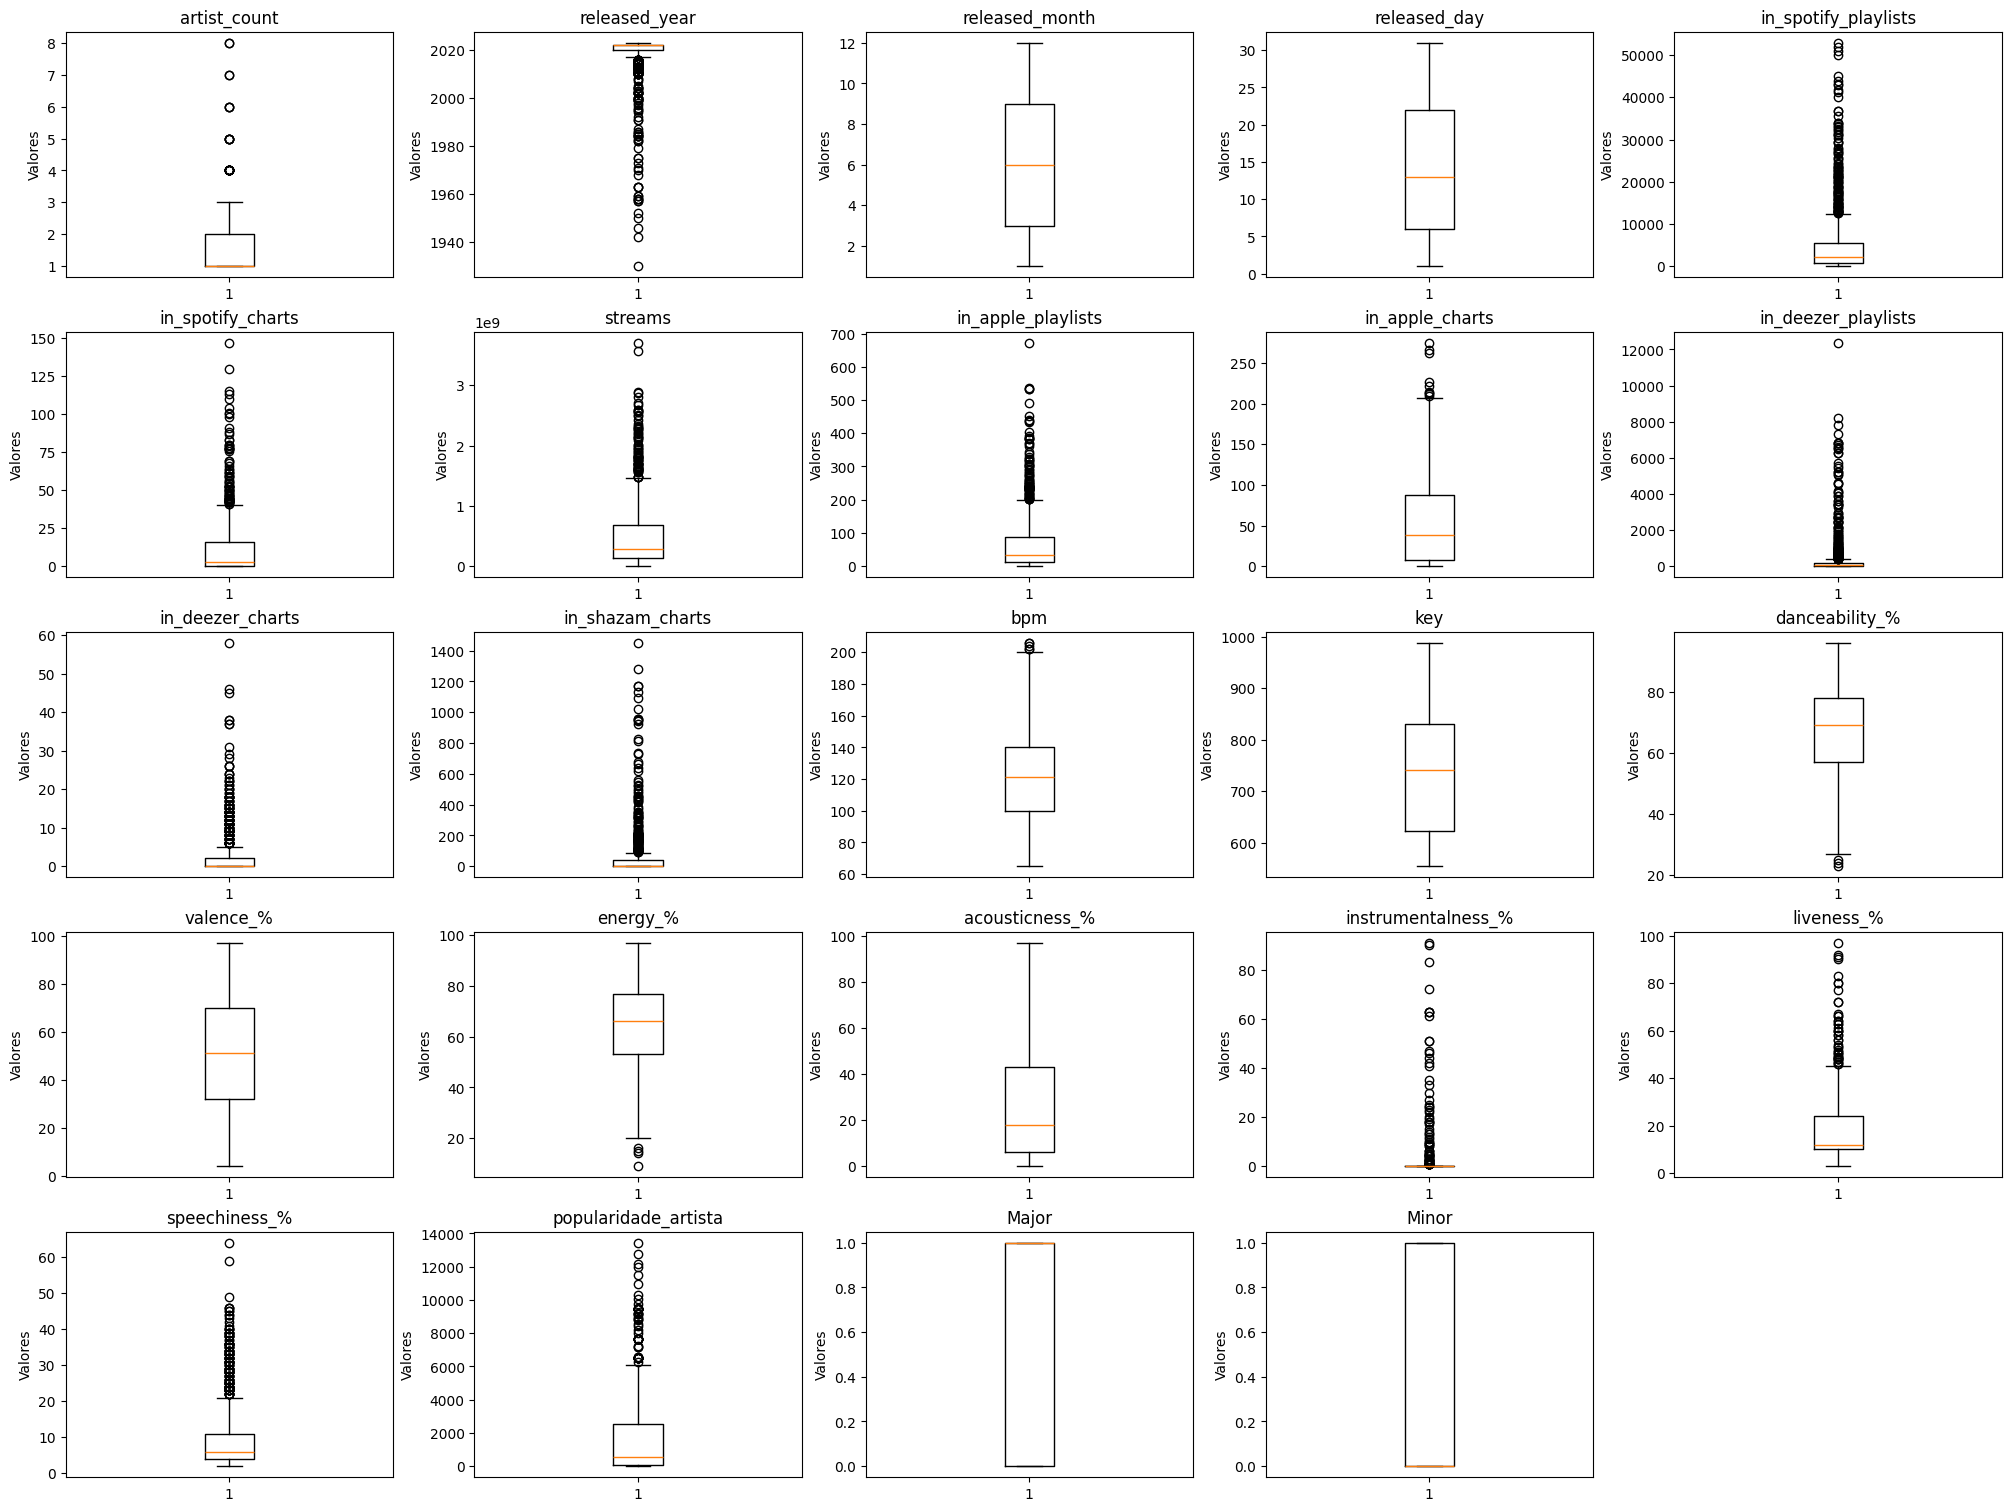

In [ ]:
## Seleçao das colunas
numeric_cols = data_aux.columns.tolist()

## Definindo número de linhas e de colunas
nrows = 5
ncols = 5
## Parâmetros de visualização
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()
## Para cada coluna, gera um boxplot considerando todos os dados NÃO NULOS da coluna. Percebe-se isso por data_aux[col].dropna()
for i, col in enumerate(numeric_cols):
    axs[i].boxplot(data_aux[col].dropna())
    axs[i].set_title(f'{col}')
    axs[i].set_ylabel('Valores')
## Aqui apaga-se os subplots vazios
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])
## Mostra-se os gráficos
plt.show()


## Tratando os Outliers com Método IQR

- Metódo interquartil identifica outliers baseados em quartis, especificamente o primeiro (25%) e o terceiro (75%)
- Ele calcula os valores representativos do 1 e 3 quartil, traça um limite de consideração de outliers (definidos por lower bound e upper_bound), se passarem dessas métricas, são considerados outliers
- O parâmetro 1.5 é o mais comumente utilizado no Método IQR
- No código, portanto, eliminamos os outliers e plotamos novamente os boxplots. A proporção dos outliers diminuiu, mas caso necessário ainda é possível retirar mais dados, mas dado os objetivos da análise, esse tratamento é apenas exploratório, por enquanto

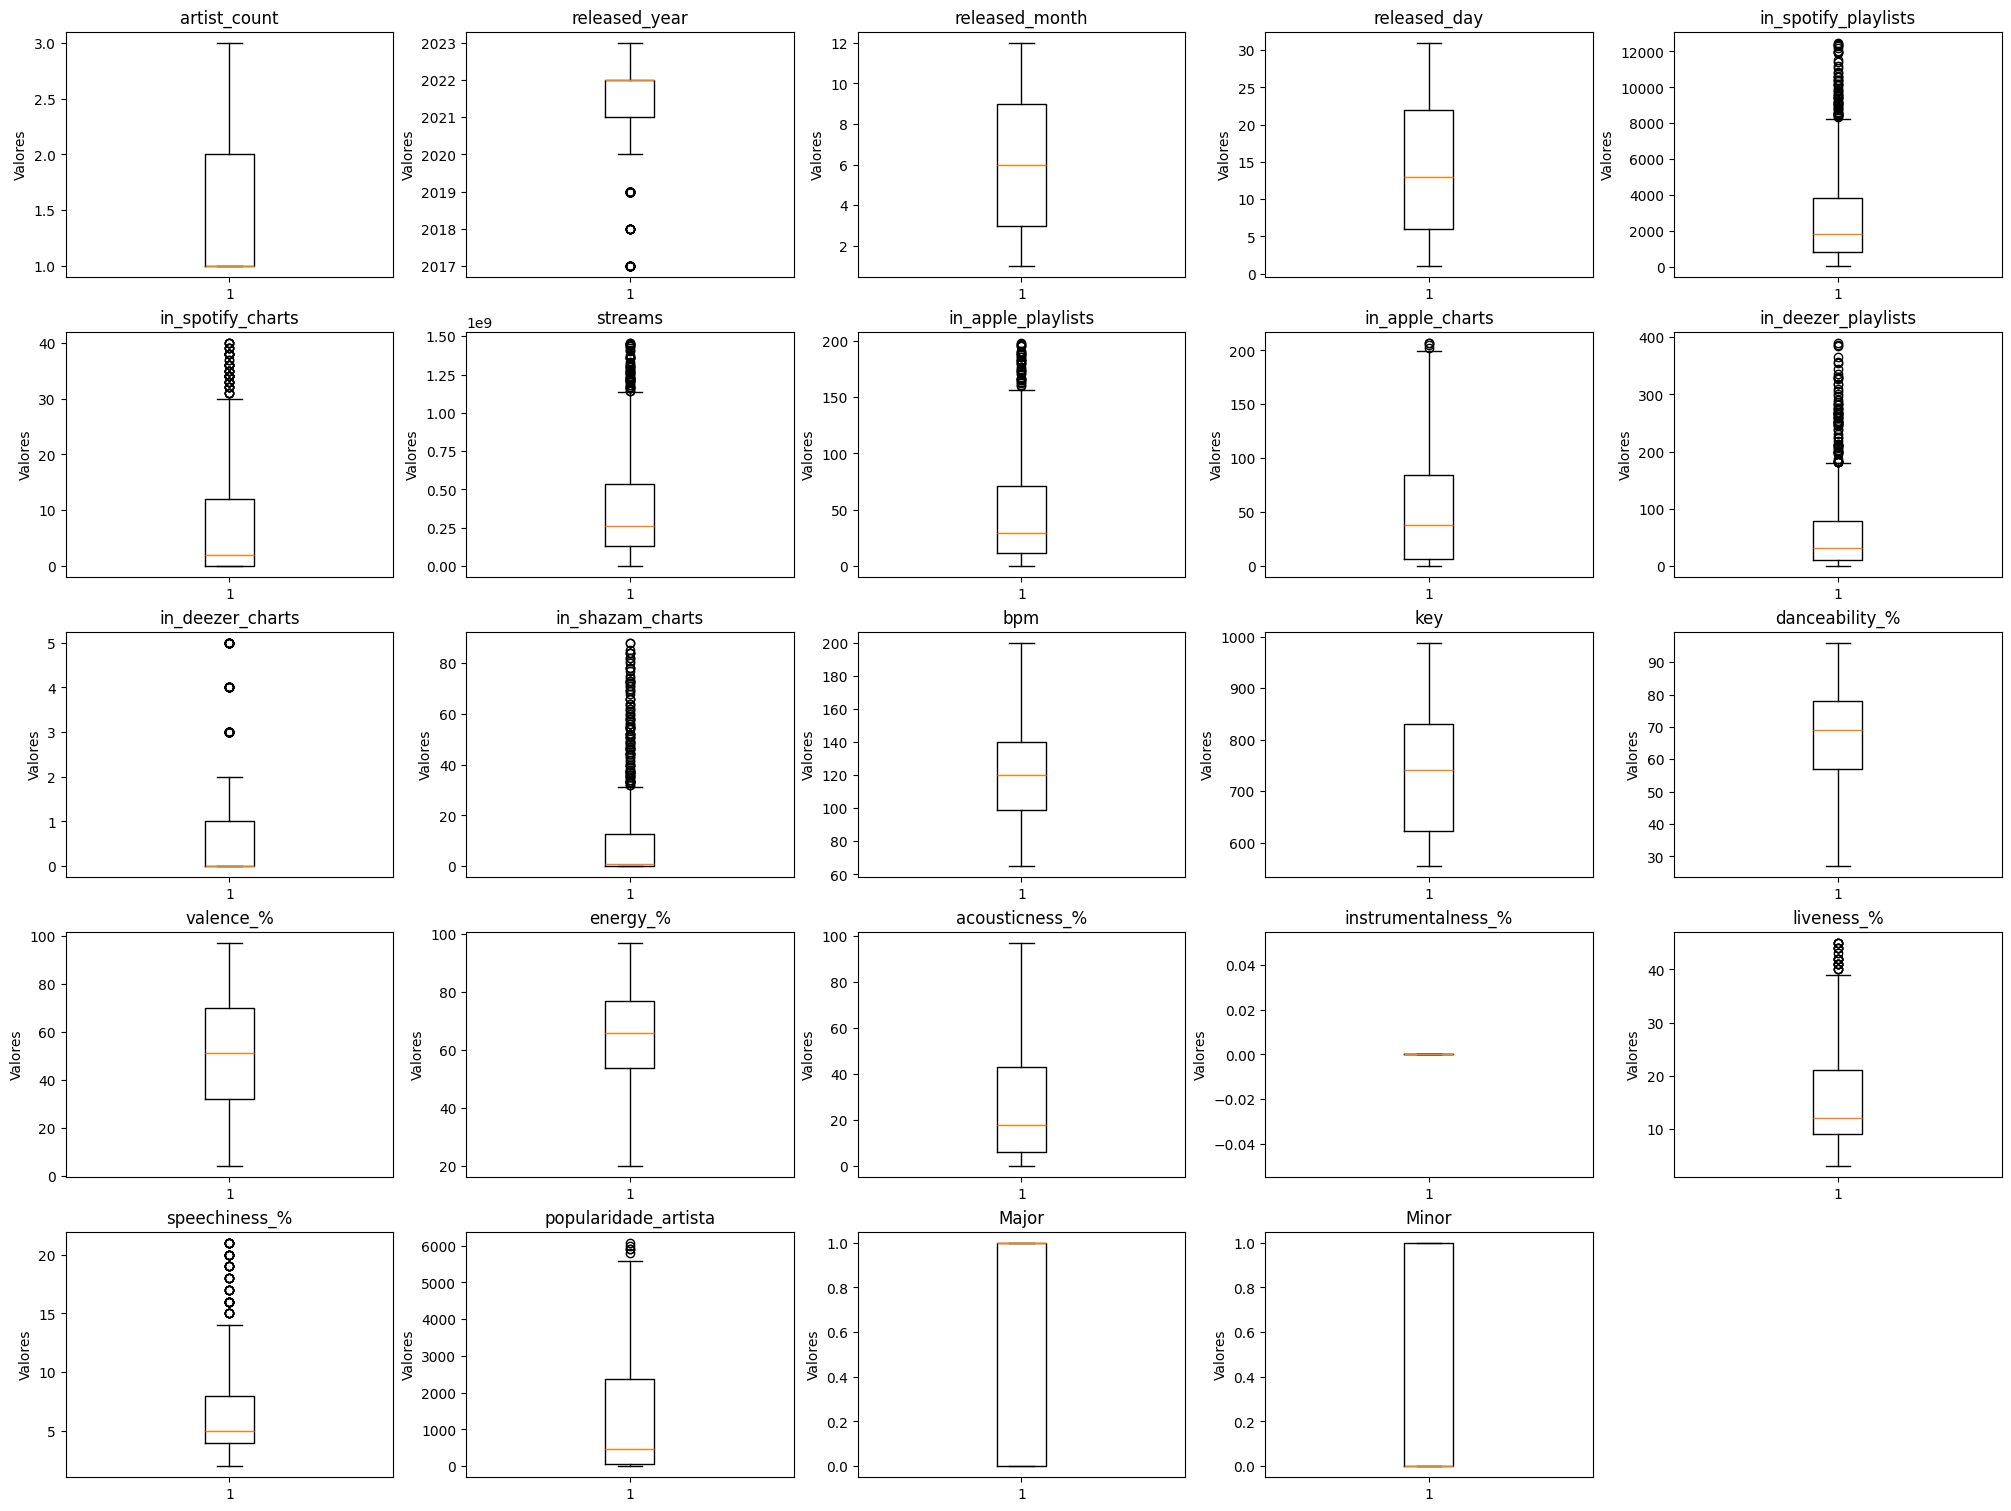

In [ ]:
## Parâmetros de visualização
nrows = 5
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    ## Achando valores representativos do Q1 e Q3
    Q1 = data_aux[col].dropna().quantile(0.25)
    Q3 = data_aux[col].dropna().quantile(0.75)
    IQR = Q3 - Q1

    ## Calculando os limites inferiores e superiores
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    ## Filtrando os outliers
    data_cleaned = data_aux[(data_aux[col] >= lower_bound) & (data_aux[col] <= upper_bound)]
    axs[i].boxplot(data_cleaned[col].dropna())
    axs[i].set_title(f'{col}')
    axs[i].set_ylabel('Valores')
for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])
plt.show()


## Analisando gráficos de Dispersão (Scatter Plots)

- Scatter Plots, ou gráficos de dispersão, é a principal forma visual de analisar a correlação de duas variáveis

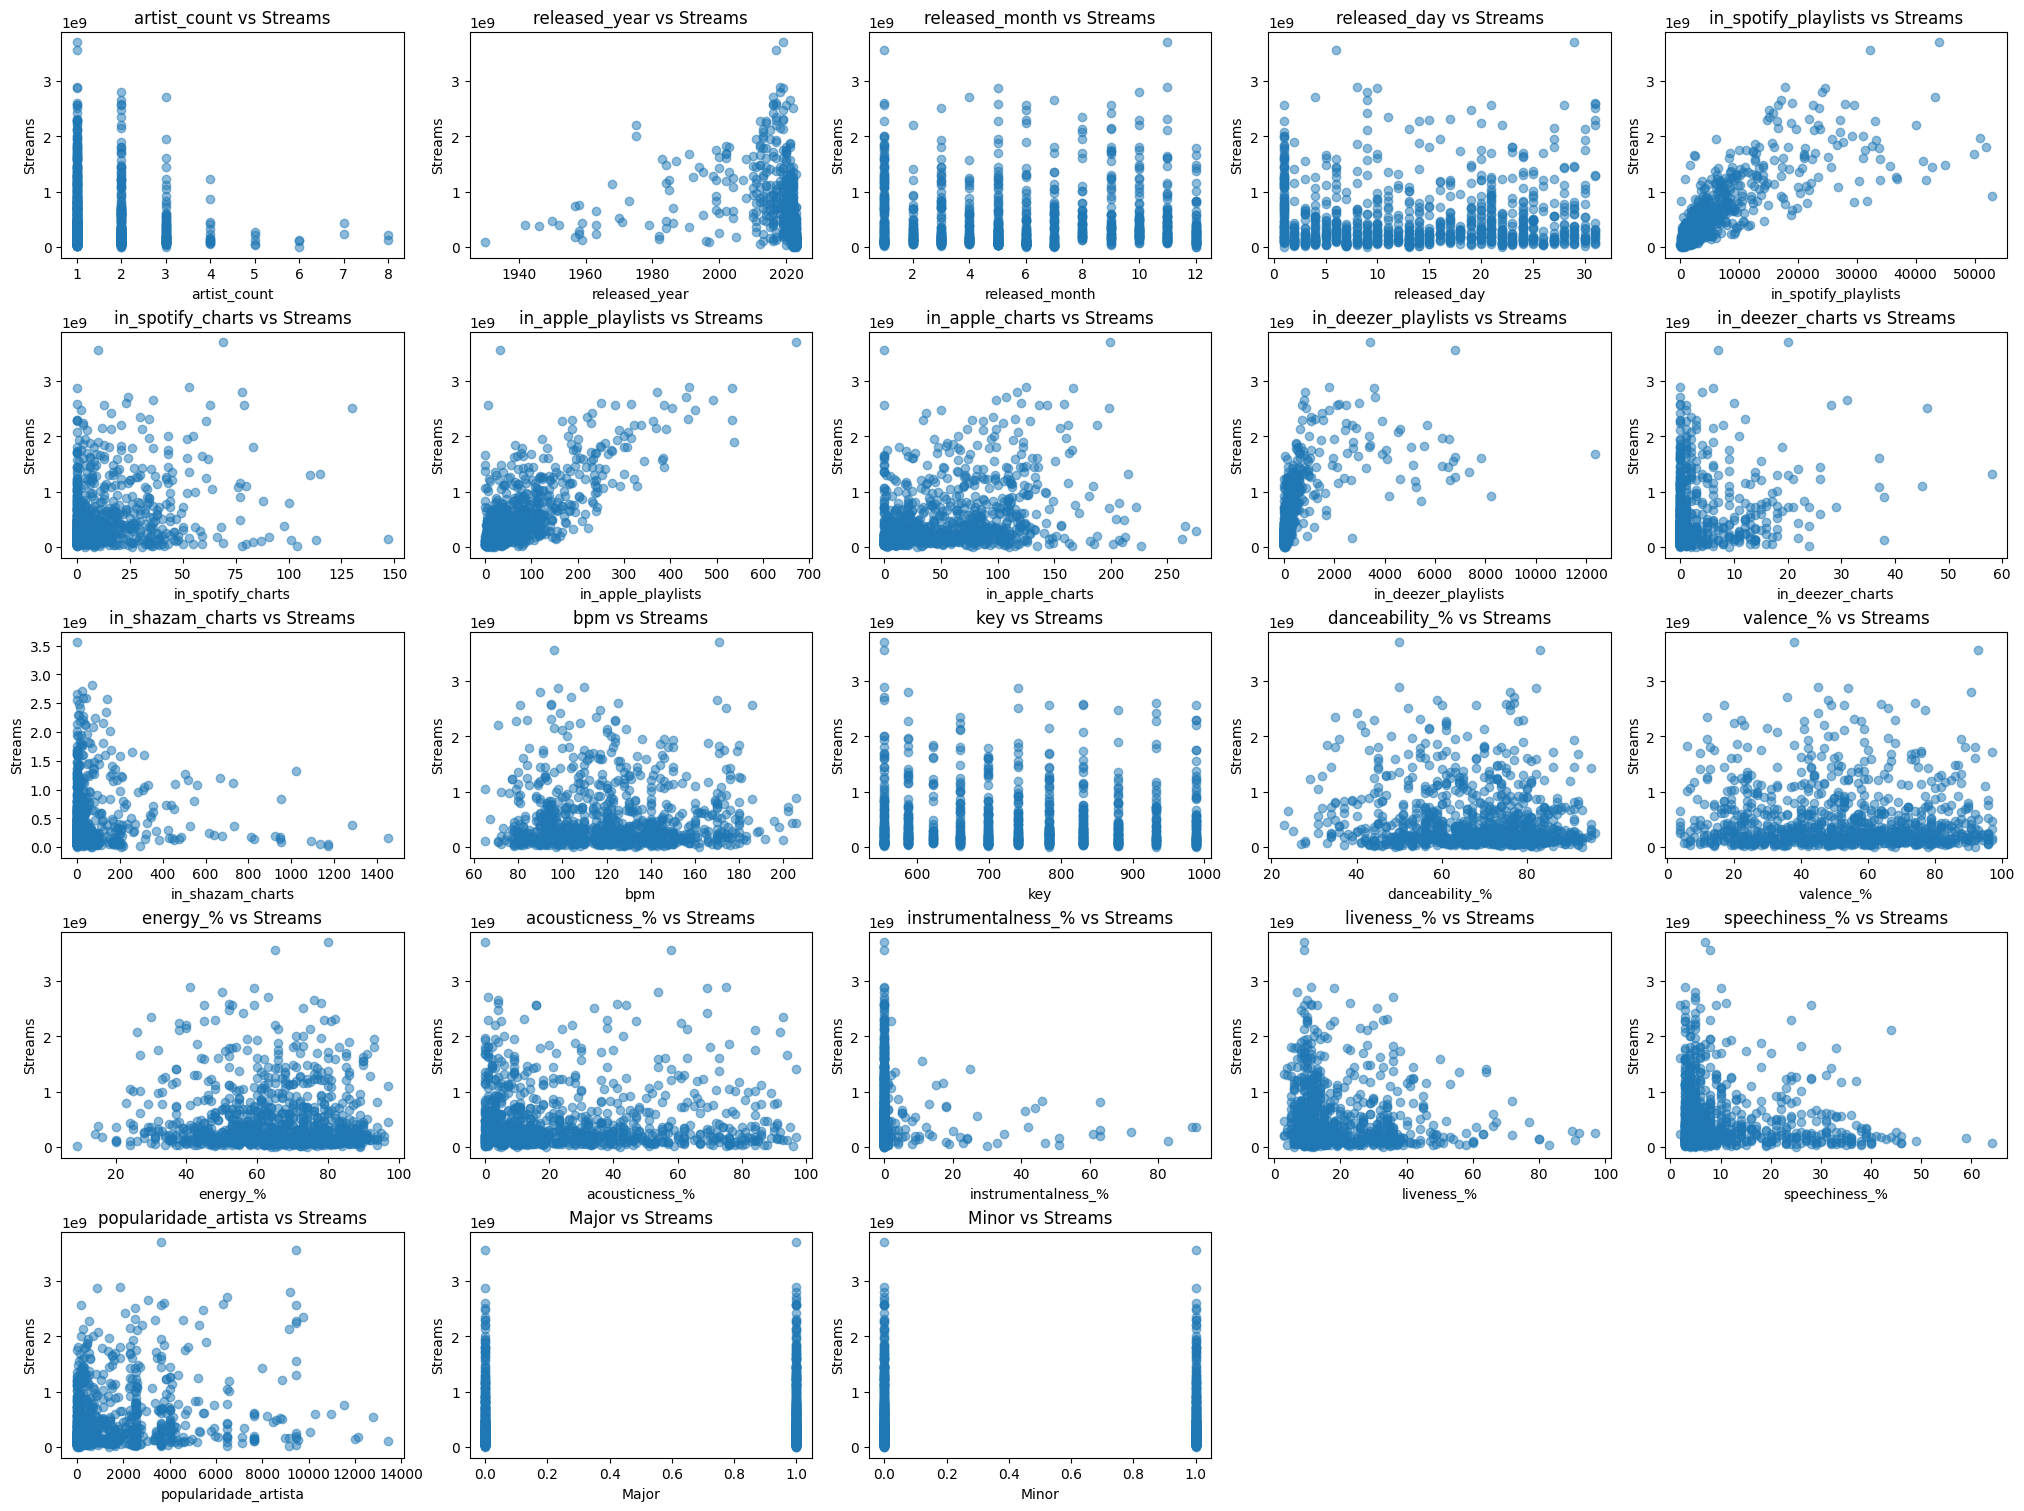

In [ ]:
## Seleção de Colunas
numeric_cols = data_aux.columns.tolist()
numeric_cols.remove('streams')

## Parâmetros de visualização
nrows = 5
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()

## Plotando gráficos de Dispersão com todos os dados não nulos, para cada coluna em comparação a Streams
for i, col in enumerate(numeric_cols):
    axs[i].scatter(data_aux[col].dropna(), data_aux['streams'][data_aux[col].notnull()], alpha=0.5)
    axs[i].set_title(f'{col} vs Streams')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Streams')

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])
plt.show()


## Visualização semelhante, mas retirando-se os outliers (deixa a visualização um pouco mais limpa)

IndexError: index 4 is out of bounds for axis 0 with size 4

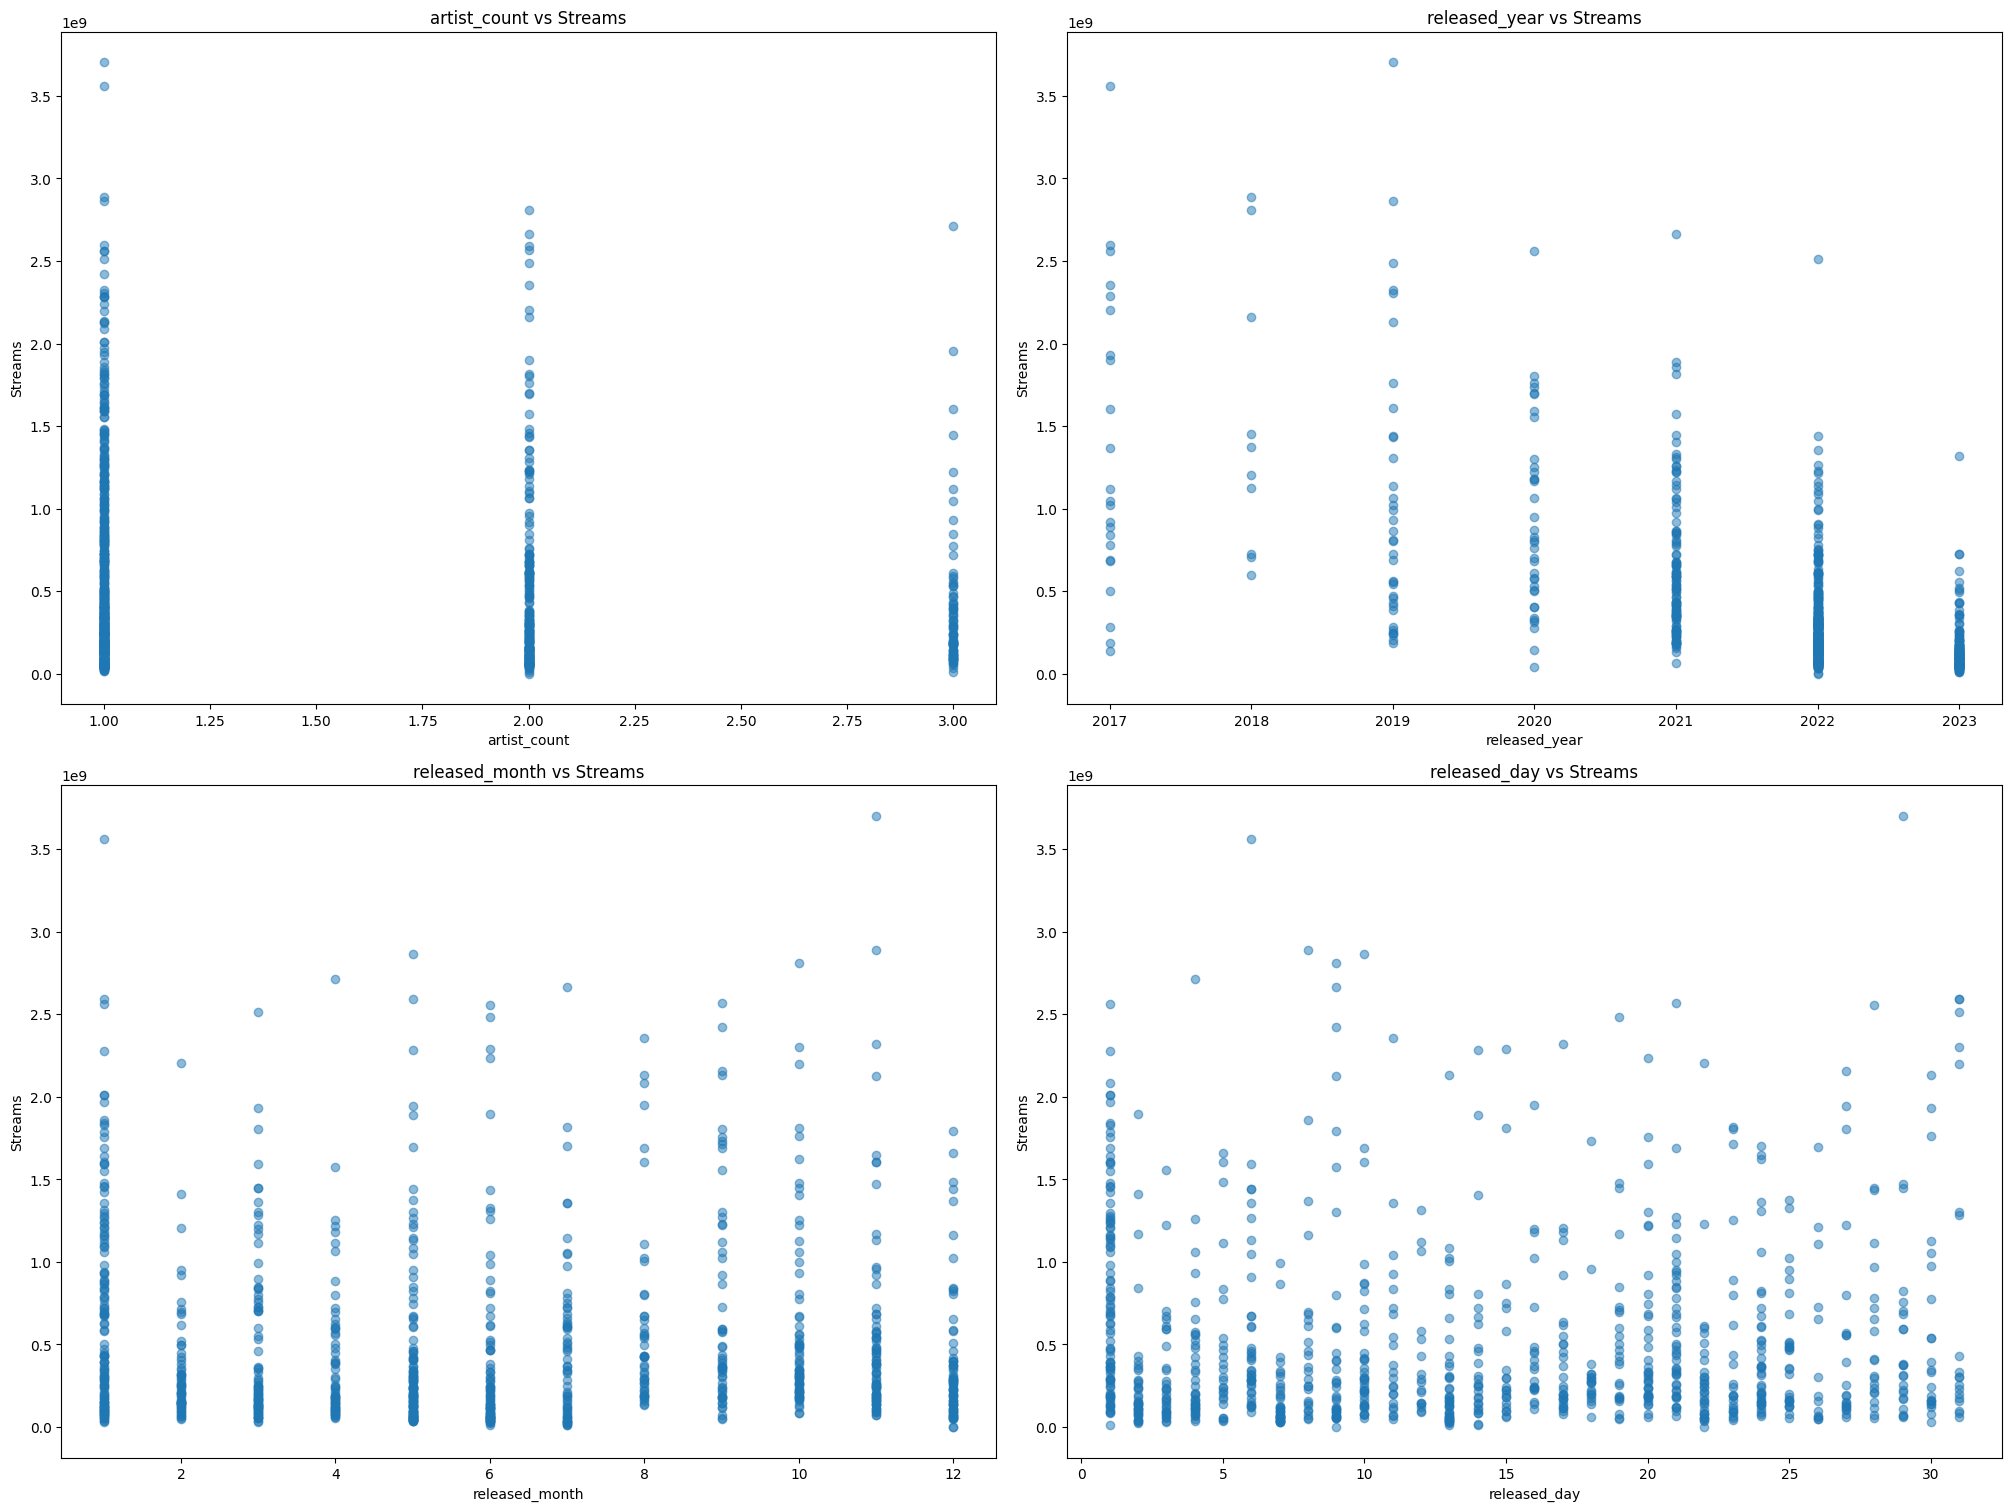

In [ ]:
## Seleção de Colunas
numeric_cols = data_aux.columns.tolist()
numeric_cols.remove('streams')

## Parâmetros de Visualização
nrows = 5
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    ## Tratamento de outliers
    Q1 = data_aux[col].dropna().quantile(0.25)
    Q3 = data_aux[col].dropna().quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR


    data_cleaned = data_aux[(data_aux[col] >= lower_bound) & (data_aux[col] <= upper_bound)]
    ## Apresentação dos Scatter Plots
    axs[i].scatter(data_cleaned[col].dropna(), data_cleaned['streams'][data_cleaned[col].notnull()], alpha=0.5)
    axs[i].set_title(f'{col} vs Streams')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Streams')
    scipy.stats.shapiro(data_aux[col])


for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])

plt.show()


## Avaliando Normalidade

- Vários testes assumem naturalmente a normalidade dos dados. Um deles é o Índice de Correlação de Pearson, ele assume que as duas variáveis , em distribuição, estão normalmente distribuídas.
- Vamos avaliar a Normalidade utilizando o teste de Shapiro-Wilk
- Aqui consideramos nivel de significância de 0.05, neste caso
- Foram plotados histogramas de distribuição apenas para observar a distribuição dos dados

 ### Shapiro-Wilk
 - Ideal para amostras pequenas (50 a 2000)
 - Popular no cálculo de normalidade
 - Baseado na comparação de coeficientes calculdados entre a distribuição da amostra e a distribuição normal teórica

- Hipóteses de teste Shapiro-Wilk
    - Hipótese Nula, H0 (pressuposta inicialmente): distribuição é normal (mais próximo de 1)
    - Hipótese Alternativa , H1 (contrária a H0): distribuição não normal (mais próximos de 0)
- Lembrando, quanto maior o p-value, maior a probabilidade de não rejeição da hipótese nula, ou seja, maior a validação dela

In [ ]:
# data_aux = data.copy()
# data_aux
# data_aux

,Unnamed: 0,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,in_apple_charts,...,Major,Minor,letter,translated_letter,translated_lyrics_IA,final_letter,neg,neu,pos,compound
0,0,2,2023,7,14,553,147,141381703,43,263,...,1,0,NaN,NaN,Seven (feat. Latto) (Explicit Ver.) Ver...,Seven (Feat. Latto) (Explicit See.) Verse 1: L...,0.109,0.790,0.101,-0.6387
1,1,1,2023,3,23,1474,48,133716286,48,126,...,1,0,"Todo está bien, no te tiene' que estresar A t...","Everything is fine, it does not have you 'to s...",LALA (Tradução para o Inglês) (Verso 1) I...,Lala (Translation to English) (verse 1) I'm on...,0.404,0.596,0.000,-0.9994
2,2,1,2023,6,30,1397,113,140003974,94,207,...,1,0,Hate to give the satisfaction asking how you'r...,Hate to give the satisfaction asking how you'r...,Vampire - Olivia Rodrigo Verse 1 I'm ...,Vampire - Olivia Rodrigo Verse 1 I'm a ...,0.093,0.862,0.045,-0.9317
3,3,1,2019,8,23,7858,100,800840817,116,207,...,1,0,"(Yeah, yeah, yeah, yeah) Fever dream high in ...","(Yeah, yeah, yeah, yeah) Fever dream high in ...",Cruel Summer He looks up grinning like a ...,Cruel Summer he looks up grinning like a devil...,0.135,0.650,0.214,0.9972
4,4,1,2023,5,18,3133,50,303236322,84,133,...,0,1,"Baby, dime la verdad Si te olvidaste de mí Y...","Baby, tell me the truth if you forgot about me...",WHERE SHE GOES (Verso 1) Ela é uma estrel...,"Where She Goes (Verse 1) She is a rock star, s...",0.000,0.884,0.116,0.9648
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
947,947,1,2022,11,3,953,0,91473363,61,13,...,1,0,NaN,NaN,"My Mind & Me (Verso 1) My mind and me, we...","My Mind & Me (Verso 1) My mind and me, we d...",0.071,0.702,0.227,0.9946
948,948,1,2022,10,21,1180,0,121871870,4,0,...,1,0,No words appear before me in the aftermath Sa...,No words appear before me in the aftermath Sa...,Bigger Than The Whole Sky (Verso 1) Eu co...,Bigger Than the Whole Sky (Verse 1) I used to ...,0.112,0.591,0.297,0.9949
949,949,2,2022,11,3,573,0,73513683,2,0,...,1,0,NaN,NaN,A Veces (feat. Feid) Verso 1: Feid Às...,A vece (Feat. Feid) Verse 1: Feid Sometimes I ...,0.260,0.586,0.154,-0.9753
950,950,3,2022,10,20,1320,0,133895612,29,26,...,1,0,NaN,NaN,En La De Ella (Em Dela) Verso 1: Feid ...,"In hers (Em dea) verse 1: Feid in hers, in her...",0.035,0.834,0.132,0.9442


IndexError: index 25 is out of bounds for axis 0 with size 25

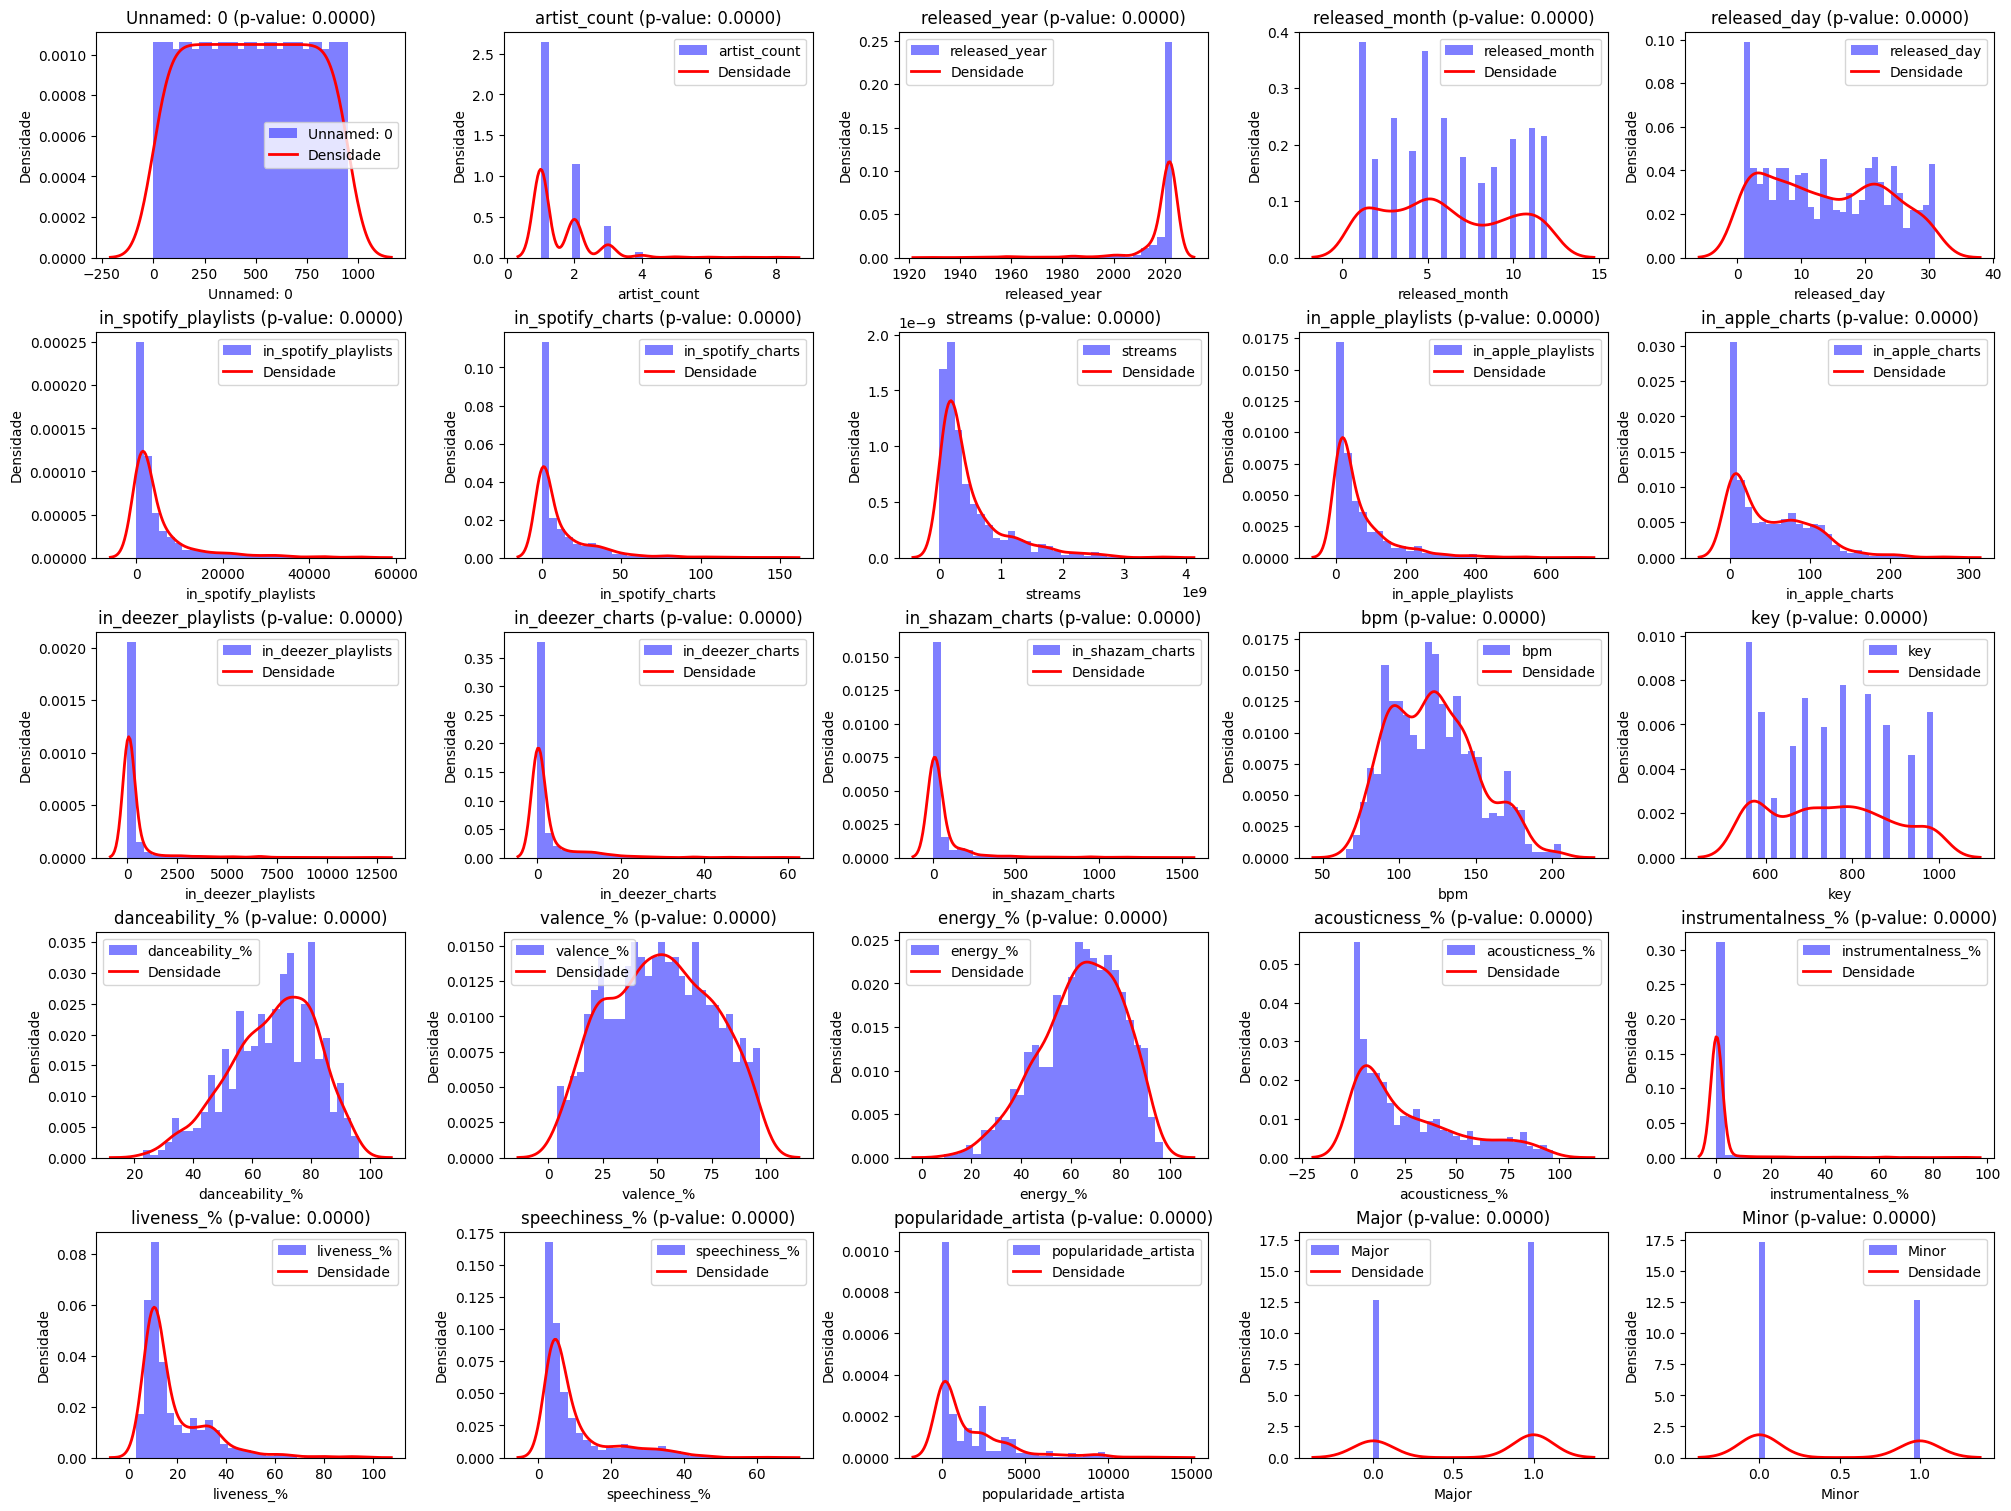

In [ ]:
## Seleção das colunas
numeric_cols = data_aux.columns.tolist()
numeric_cols.remove('streams')


## Parâmetros de visualização
nrows = 5
ncols = 5
fig, axs = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 15), constrained_layout=True)
axs = axs.flatten()

for i, col in enumerate(numeric_cols):
    ## considerando apenas valores não ausentes para cada histograma
    axs[i].hist(data_aux[col].dropna(), bins=30, alpha=0.5, color='blue', label=col, density=True)

    ## Linha de densidade
    sns.kdeplot(data_aux[col].dropna(), ax=axs[i], color='red', lw=2, label='Densidade')

    ## Para cada um dos histogramas, acompanha teste estatístico de Shapiro-Wilk, e apresenta no título
    statistic, pvalue = scipy.stats.shapiro(data_aux[col].dropna())
    axs[i].set_title(f'{col} (p-value: {pvalue:.4f})')
    axs[i].set_xlabel(col)
    axs[i].set_ylabel('Densidade')
    axs[i].legend()

for j in range(i + 1, nrows * ncols):
    fig.delaxes(axs[j])

plt.show()


In [ ]:
def check_normality(data):
    results = []
    for col in data.columns:
        ## Considera apenas valores não nulos na análise
        stat, p_value = shapiro(data[col].dropna())
        # Adiciona o resultado à lista (1 para normal, 0 para não normal)
        is_normal = 1 if p_value > 0.05 else 0
        results.append({'column': col, 'normal': is_normal})
    normality_df = pd.DataFrame(results)
    return normality_df

normality_results = check_normality(data_aux)
normality_results

### Conclusão do Teste de Normalidade

- Nenhuma coluna segue a distribuição normal
- Para a avaliação de correlação entre 2 variáveis, serão testadas então com a correlação de "Spearman"

### Gerando correlações entre 2 variáveis com Índice de Spearman

- Note que o .corr() ele considera apenas valores , para cada pares de variáveis, não ausentes, não sendo necessário fazer esse tratamento
- Note que, além disso, utiliza-se o teste de correlação de Spearman pois ele é mais adequado para distribuições não normais, ao contrário do teste de correlação de Pearson, que assume normalidade para cada dois pares de variáveis

In [ ]:
def gera_matriz_correlacao(method):
    ## Criação de matriz de correlação com método escokhido
    correlation_matrix = data_aux.corr(method = method)

    plt.figure(figsize=(12, 10))
    ## Plotando matriz
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True, annot_kws={"size": 8} )
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    plt.tight_layout()
    plt.show()


In [ ]:
gera_matriz_correlacao("spearman")

## Word Cloud: análise de palavras mais presentes em músicas hits do Spotify

- OBS: para a análise desses dados, escolheu-se , aqui no Notebook, por deixar várias etapas de coleta e tratamento comentadas, haja vista que demoraram muito para processar, mas ainda visíveis ao leitor.
- Entretanto, foi disponibilizado um DataFrame já com todos os dados coletados e tratados, logo na célula abaixo

In [ ]:
url = f"https://drive.google.com/uc?id=1gcnDWMsXkUi2e936gKzSBbH3EI1xkNC1"
output = "translated_lyrics.csv"
gdown.download(url, output, quiet=False)

Downloading...
From: https://drive.google.com/uc?id=1gcnDWMsXkUi2e936gKzSBbH3EI1xkNC1
To: /content/translated_lyrics.csv
100%|██████████| 4.64M/4.64M [00:00<00:00, 39.6MB/s]


'translated_lyrics.csv'

In [ ]:
data = pd.read_csv(output)
data.head()

,Unnamed: 0,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,...,Major,Minor,letter,translated_letter,translated_lyrics_IA,final_letter,neg,neu,pos,compound
0,0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703,...,1,0,NaN,NaN,Seven (feat. Latto) (Explicit Ver.) Ver...,Seven (Feat. Latto) (Explicit See.) Verse 1: L...,0.109,0.790,0.101,-0.6387
1,1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286,...,1,0,"Todo está bien, no te tiene' que estresar A t...","Everything is fine, it does not have you 'to s...",LALA (Tradução para o Inglês) (Verso 1) I...,Lala (Translation to English) (verse 1) I'm on...,0.404,0.596,0.000,-0.9994
2,2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974,...,1,0,Hate to give the satisfaction asking how you'r...,Hate to give the satisfaction asking how you'r...,Vampire - Olivia Rodrigo Verse 1 I'm ...,Vampire - Olivia Rodrigo Verse 1 I'm a ...,0.093,0.862,0.045,-0.9317
3,3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817,...,1,0,"(Yeah, yeah, yeah, yeah) Fever dream high in ...","(Yeah, yeah, yeah, yeah) Fever dream high in ...",Cruel Summer He looks up grinning like a ...,Cruel Summer he looks up grinning like a devil...,0.135,0.650,0.214,0.9972
4,4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322,...,0,1,"Baby, dime la verdad Si te olvidaste de mí Y...","Baby, tell me the truth if you forgot about me...",WHERE SHE GOES (Verso 1) Ela é uma estrel...,"Where She Goes (Verse 1) She is a rock star, s...",0.000,0.884,0.116,0.9648


## Coleta de dados: letras de músicas
- Para usar o Word Cloud, precisamos de todas as letras das músicas e salvá-las em uma coluna "letter"
- Para a coleta, foi usada a API Lyrics.ovh (https://lyricsovh.docs.apiary.io/#reference/0/lyrics-of-a-song/search?console=1), que é gratuita e possui uma pesquisa de músicas de forma automática
- O código abaixo realiza isso, e atribui "Erro x" ao processo que deu errado, e salva no DataFrame em "Letter"

In [ ]:
# Função para buscar a letra da música usando a API Lyrics.ovh
def get_lyrics(artist_name, song_title):
    # URL da API
    lyrics_url = f"https://api.lyrics.ovh/v1/{artist_name}/{song_title}"

    # Fazendo a requisição
    response = requests.get(lyrics_url)

    if response.status_code == 200:
        data = response.json()
        # Verifica se a letra foi encontrada
        if 'lyrics' in data:
            return data['lyrics']
        else:
            return "Letra não encontrada."
    else:
        return f"Erro {response.status_code}"

# Adiciona uma nova coluna 'letter' ao DataFrame
# data['letter'] = data.apply(lambda row: get_lyrics(row['artist(s)_name'], row['track_name']), axis=1)



In [ ]:
# data.head()

In [ ]:
## substitui "Erro 404" por nulo (mostrando para quais linhas a coleta falhou)7

# data['letter'] = data['letter'].str.replace("Erro 404", "", regex = False)
# data['letter'] = data['letter'].replace("", np.nan)


In [ ]:
# data.isnull().sum()

In [ ]:
# data[data['letter'].isnull()]

In [ ]:
## verificando de todos os erros da coleta, quantos tinham mais de um artista

# result = data[(data['letter'].isnull()) ]
# result = result[result['artist_count'] > 1]
# result.shape[0]

## Repetindo Coletas

- A API é uma API por busca, então de certa forma faltará dados ainda
- Então, optou-se por fazer uma segunda coleta apenas considerando o primeiro autor, haja vista que 363 das 512 , 70%, (das músicas não achadas teriam mais de um artista)

In [ ]:
def get_lyrics(artist_name, song_title):
    lyrics_url = f"https://api.lyrics.ovh/v1/{artist_name}/{song_title}"

    # Fazendo a requisição
    response = requests.get(lyrics_url)

    if response.status_code == 200:
        data = response.json()
        # Verifica se a letra foi encontrada
        if 'lyrics' in data:
            return data['lyrics']
        else:
            return "Letra não encontrada."
    else:
        return f"Erro {response.status_code}"

# atualizando dados apenas onde a coleta falhou

# data['letter'] = data.apply(
#     ### O primeiro parâmetro pega o primeiro autor, o segundo pega o nome da música
#     lambda row: get_lyrics(row['artist(s)_name'].split(',')[0].strip(), row['track_name'])
#     if pd.isnull(row['letter']) else row['letter'],
#     axis=1
# )

In [ ]:
## Tratando "Erro 404"

# data['letter'] = data['letter'].replace("Erro 404", np.nan)
# data.isnull().sum()

## Resultado da nova coleta
- De 512 faltantes (53.78%), foram reduzidos para 376 (39.5%)
- A princípio pode-se repetir a coleta por outras formas para aumentar a quantidade de dados disponíveis, mas por questão de tempo e foco em múltiplas análises, decidiu-se manter essa quantidade de dados

In [ ]:
## Substituindo \r e \n que aparecem nas músicas por " " para que o Word Cloud possa funcionar mais corretamente

# data["letter"] = data["letter"].replace({r'\r': ' ', r'\n': ' '}, regex=True)

## Tradução das letras
- Imagine que temos as palavras "Amor" e "Love", embora signifiquem a mesma coisa, o algoritmo de Word Cloud entende como palavras distintas.
- Para isso, foi decidido usar um algoritmo de tradução das letras para o Inglês

## Função para traduzir as letras

- Utiliza-se a API do Google Translator para traduzir as letras

In [ ]:
### Instancia o objeto que irá traduzir as palavras
translator = Translator()

def translate_text(text):
    try:
        translated = translator.translate(text, src='auto', dest='en')
        return translated.text
    except Exception as e:
        return text ### retorna texto original


## Cria nova coluna com letras traduzidas para ingles

In [ ]:
# data['translated_letter'] = data['letter'].dropna().apply(translate_text)

In [ ]:
# data.isnull().sum()

## Word Cloud

- Nessa parte, gera-se o Word Cloud a partir da biblioteca wordcloud
- Note que para não aparecerem as "stop words", palavras como "É", "que", etc.. , usa-se a biblioteca nltk e suas stopwords para ignorá-las

In [ ]:
## junta-se todas as letras em uma string para funcionamento do word cloud
def gera_word_cloud(data, column):
    all_lyrics = ' '.join(data[column].dropna())  # Juntar letras, ignorando NaN

    stopwords_nltk = set(stopwords.words('english')).union(set(stopwords.words('portuguese')))

    ## adicionando palavras comuns (as palavras verse/verso e chorus/refrão foram adicionadas dado o tratamento dos dados)
    stopwords_nltk.update(["I'm", "one", "verse", "chorus", "verso", "refrão", "aqui"])

    # criação do word cloud
    wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords = stopwords_nltk).generate(all_lyrics)

    # plotando word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # Não mostrar eixos
    plt.title('Word Cloud das Letras das Músicas', fontsize=20)
    plt.show()


In [ ]:
gera_word_cloud(data, "translated_letter")

## Testando apenas com os 10% com mais streams
- Vemos quais letras estão disponíveis
- Filtra-se os 10% com mais streams
- Depois gera-se o word cloud

In [ ]:
# remove-se as linhas onde 'letter' é NaN
data_with_lyrics = data.dropna(subset=['translated_letter'])

# calcula-se o limite para os 10% superiores de streams
top_10_percentile = data_with_lyrics['streams'].quantile(0.9)

# filtra-se as músicas que estão no top 10% de streams e têm letra
top_10_percent_with_lyrics = data_with_lyrics[data_with_lyrics['streams'] >= top_10_percentile]

In [ ]:
top_10_percent_with_lyrics.head()

In [ ]:
gera_word_cloud(top_10_percent_with_lyrics, "translated_letter")

## Preenchendo letras com IA generativa
- Nessa parte do código, tentaremos preencher os dados faltantes com o uso da IA generativa
- Para isso, usaremos uma API do Google que nos permitirá acessar IAs famosas e criar prompts de forma automática. Para isso, vamos utilizar (https://aistudio.google.com/app/apikey), é possível gerar uma chave gratuitamente por esse site


## Criando Modelo com chave API

- O modelo possui safety_settings com nenhum bloqueio para as respostas para alguns conteúdos sensíveis, haja vista que algumas letras estavam sendo barradas por causa desses parâmetros

In [ ]:
# Código para exibir o texto formatado segundo o padrão Markdown
def to_markdown(text):
  text = text.replace('•', '  *')
  return Markdown(textwrap.indent(text, '> ', predicate=lambda _: True))

# Define a chave de API como uma variável de ambiente temporária e usa ela para acessar a API do google
os.environ['GOOGLE_API_KEY'] = getpass("Por favor, cole sua chave de API aqui: ")
GOOGLE_API_KEY = os.getenv('GOOGLE_API_KEY')
genai.configure(api_key=GOOGLE_API_KEY)

generation_config = {
    'candidate_count': 1, # A versão atual está com problemas nesse parâmetro, manter como 1 até ajustes da Google
    'stop_sequences': None, # Tente ['\n', '.', 'prompt']
    'max_output_tokens': None, # Para tokens de baixo valor a API às vezes apresenta erros, recomenda-se usar None até ajustes da Google
    'temperature': 0.5,
    'top_p': None,
    'top_k': None,
}
### Não dar nenhum tipo de block na hora de gerar as respostas
safety_settings = [
    {"category": "HARM_CATEGORY_SEXUALLY_EXPLICIT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HATE_SPEECH", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_HARASSMENT", "threshold": "BLOCK_NONE"},
    {"category": "HARM_CATEGORY_DANGEROUS_CONTENT", "threshold": "BLOCK_NONE"}
]

model = genai.GenerativeModel(
        model_name='gemini-pro',
        generation_config = generation_config,
        safety_settings=safety_settings)

# Cria a variável com parâmetros do modelo
# model = genai.GenerativeModel('gemini-pro')

# Gera conteúdo com gemini-pro
response = model.generate_content("Me diga a capital da França")
to_markdown(response.text)

## Gerando letras traduzidas automaticamente a partir de nome de artista e música com IA Gemini Pro
- Esse algoritmo , dado um prompt, preenche na coluna nova "translated_lyrics_IA" as letras que a IA produziu
- Com isso, pode-se cruzar com as letras já obtidas, gerando uma coleta mais eficiente, é como se fosse uma "busca" melhor

In [ ]:
def get_translated_lyrics(artist, track):
# função para obter a letra traduzida para o inglês
    prompt = f"Eu tenho uma música chamada {track} de {artist}. Por favor, forneça a letra completa dessa música traduzida para o inglês."
    try:
        response = model.generate_content(prompt)
        return response.text  # assume que response contém apenas a letra traduzida como string
    except ValueError as e:
        # retorna uma mensagem padrão ou vazia se houver erro
        print(f"Erro ao gerar conteúdo para {artist} - {track}: {e}")
        return None

# aplica a função a cada linha do DataFrame e cria a nova coluna
# data['translated_lyrics_IA'] = data.apply(lambda row: get_translated_lyrics(row['artist(s)_name'], row['track_name']), axis=1)

In [ ]:
# data["translated_lyrics_IA"] = data["translated_lyrics_IA"].replace({r'\r': ' ', r'\n': ' '}, regex=True)

### Removendo linhas com "verso" ou refrão // é uma abordagem, mas usaremos outra!

# data['translated_lyrics_IA'] = data['translated_lyrics_IA'].str.replace('*', ' ', regex=False)


In [ ]:
## obtém a letra final, ou seja, traduzida

# data['final_letter'] = data['translated_lyrics_IA'].dropna().apply(translate_text)

## Gerando novamente o Word Cloud, mas com dados advindos da IA

In [ ]:
gera_word_cloud(data, "final_letter")

## Gerando Word Cloud para 10% mais significativo de streams

In [ ]:
# Remover as linhas onde 'letter' é NaN
data_with_lyrics = data.dropna(subset=['final_letter'])

# Calcular o limite para os 10% superiores de streams
top_10_percentile = data_with_lyrics['streams'].quantile(0.9)

# Filtrar as músicas que estão no top 10% de streams e têm letra
top_10_percent_with_lyrics = data_with_lyrics[data_with_lyrics['streams'] >= top_10_percentile]


In [ ]:
gera_word_cloud(top_10_percent_with_lyrics, "final_letter")

## Retraduzindo as letras

- Dado erros da API do Google, é possível retraduzir as músicas usando IA Generativa, só que agora usando conceitos de Engenharia de Prompt. Basicamente, esses conceitos ajudam a criar o melhor prompt para que a IA gere um melhor resultado
- Para retraduzir, usamos a função abaixo, parecida com outra já criada anteriormente
- Infelizmente, devido à limitação da cota da API Gratuita, não foi possível gerar essa tradução

In [ ]:
def get_retranslated_lyrics(music):
   ## Usando Engenharia de Prompt
    try:
        prompt = f"""
        Você é um tradutor profissional. Sua tarefa é traduzir o texto fornecido na variável `music` para o inglês, palavra por palavra. A tradução deve ser literal e não interpretativa. Siga as regras abaixo:

        Regras e Formato:
        1. Traduza cada palavra isoladamente, preservando seu significado literal no inglês.
        2. Não interprete o texto como uma frase ou procure recriar rimas, métricas ou significados figurativos.
        3. Para palavras que não possuem tradução direta, mantenha-as no idioma original.
        4. Retorne a tradução no mesmo formato e na mesma ordem das palavras da entrada.

        Exemplo 1:
        Entrada:
        "Amor e saudade"
        Saída:
        "Love and longing"

        Exemplo 2:
        Entrada:
        "Coração partido"
        Saída:
        "Heart broken"

        Texto a traduzir:
        {music}
        """
        response = model.generate_content(prompt)
        return response.text
    except ValueError as e:
        print(f"Erro ao gerar conteúdo para {music}: {e}")
        return None

# data['retranslated_lyrics_IA'] = data.apply(lambda row: get_retranslated_lyrics(row['translated_lyrics_IA']), axis=1)


## Análise de Sentimentos - VADER
- O VADER (Valence Aware Dictionary and sentiment Reasoner) é uma ferramenta de análise de sentimentos que lida com textos com linguagem natural, por exemplo letras de música
- O VADER classifica ou quantifica a emoção de um texto, com uma pontuação de -1 a +1, em que -1 representa sentimentos negativos, 0 neutros e +1 positivos
### Funcionamento
- O VADER usa um dicionário de valência: cada palavra tem uma "pontuação" que reflete um sentimento. Por exemplo, "bom" pode valer +2, enquanto "ruim" -2.
- Fora isso, o VADER interpreta a frase com modificadores, como "muito", que intensifica sentimentos ou "pouco", que suaviza os sentimentos, bem como "não" , que inverte sentimentos
### Saídas
- neg: pontuação de sentimento negativo (0 a 1)
- neu: neutro (0 a 1)
- pos: (0 a 1)
- compound: calculada a partir das 3 pontuações, resume o sentimento (-1 a 1)

In [ ]:
# Inicialização da análise de sentimentos
sia = SentimentIntensityAnalyzer()

# Obtendo a pontuação dos sentimentos
def get_sentiment_scores(text):
    return sia.polarity_scores(text)

# Aplicando a função a "translated_letter" e gerando os sentimentos para análise de correlação
data[['neg', 'neu', 'pos', 'compound']] = data['final_letter'].dropna().apply(get_sentiment_scores).apply(pd.Series)


## Gerando novamente a análise de correlação agora com as colunas de sentimentos da música


In [ ]:
data_aux = data.drop(columns = ['Unnamed: 0', 'translated_letter', 'letter', 'translated_lyrics_IA', 'final_letter', 'track_name', 'artist(s)_name'])

In [ ]:
gera_matriz_correlacao("spearman")

### Análise temporal

In [ ]:
novo_df = df.copy()

In [ ]:
# Criando uma nova coluna com o período completo
novo_df['release_date'] = novo_df['released_year'].astype(str) + '-' + \
                          novo_df['released_month'].astype(str).str.zfill(2) + '-' + \
                          novo_df['released_day'].astype(str).str.zfill(2)

In [ ]:
# Mudando o formato para formato de data
novo_df['release_date'] = pd.to_datetime(novo_df['release_date'], errors='coerce')
novo_df['release_date']

In [ ]:
# Gráfico de dispersão de Streams por data de lançamento
fig = px.scatter(novo_df, x='release_date', y='streams', title='Streams por data de lançamento')
fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    title_x=0.5)
fig

In [ ]:
# Gráfico de linhas de Streams por ano de lançamento
streams_por_ano = novo_df.groupby('released_year')['streams'].sum().reset_index()
fig = px.line(streams_por_ano, x='released_year', y='streams', title='Streams por ano de lançamento')
fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    title_x=0.5)
fig

Os gráficos acima indicam um aumento significativo no número de streams para músicas lançadas a partir de 2000, refletindo a popularização das plataformas de streaming digital. Antes de 1980, o número de streams é consideravelmente menor, sugerindo que músicas mais antigas são menos acessadas ou procuradas nas plataformas atuais. A partir de 2010, há uma explosão no número de músicas com alta quantidade de streams, indicando um crescimento da disponibilidade e do consumo de músicas digitais nos últimos anos. Isso sugere uma preferência por lançamentos recentes e o impacto das tecnologias de streaming no comportamento de consumo musical.

In [ ]:
# Gráfico de dispersão de Streams por mês de lançamento
fig = px.scatter(novo_df, x='released_month', y='streams', title='Streams por mês de lançamento')

nomes_meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Maio', 'Jun',
         'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=nomes_meses,
    ),
    title_x=0.5)

fig

In [ ]:
# Gráfico de barras para evidenciar o mês com maior concentração de Streams
streams_por_mes = novo_df.groupby('released_month')['streams'].sum().reset_index()

# Identificando o valor máximo de streams
max_streams = streams_por_mes['streams'].max()

colors = ['royalblue' if streams == max_streams else 'grey' for streams in streams_por_mes['streams']]

fig = px.bar(
    streams_por_mes,
    x='released_month',
    y='streams',
    title='Streams por mês de lançamento')

fig.update_traces(marker=dict(color=colors))

fig.update_layout(
    xaxis_title='',
    yaxis_title='',
    xaxis=dict(
        tickmode='array',
        tickvals=list(range(1, 13)),
        ticktext=nomes_meses,
    ),
    title_x=0.5)
fig


Janeiro é o mês com a maior concentração de streams, destacando-se de maneira significativa em comparação aos outros meses. No entanto, não há uma tendência clara de crescimento ou declínio de streams ao longo do ano, o que sugere que os picos estão mais relacionados a fatores pontuais, como eventos específicos, datas comemorativas, ou calendários de lançamentos de álbuns.

In [ ]:
# Gráfico de dispersão de Streams por dia de lançamento
fig = px.scatter(novo_df, x='released_day', y='streams', title='Streams por dia de lançamento')
fig.update_layout(
    xaxis_title = '',
    yaxis_title = '',
    title_x=0.5)
fig

In [ ]:
# Gráfico de barras para evidenciar o dia com maior concentração de Streams
streams_por_dia = novo_df.groupby('released_day')['streams'].sum().reset_index()

# Identificando o valor máximo de streams
max_streams_dia = streams_por_dia['streams'].max()

colors = ['royalblue' if streams == max_streams_dia else 'grey' for streams in streams_por_dia['streams']]

fig = px.bar(streams_por_dia,
             x='released_day',
             y='streams',
             title='Streams por dia de lançamento')

fig.update_traces(marker=dict(color=colors))

fig.update_layout(
    xaxis_title = '',
    yaxis_title = '',
    title_x=0.5)
fig

O gráfico revela que o dia 1 é o principal dia para concentrações de streams, com um volume significativamente superior aos demais. Picos menores ocorrem nos dias 6, 9 e 21, enquanto os outros dias mostram uma distribuição mais equilibrada e baixa. Após o dia 20, há uma leve elevação no número de streams. De modo geral, o gráfico sugere que o início do mês é um momento estratégico para lançamentos, possivelmente por gerar maior visibilidade ou interesse dos usuários, com oportunidades adicionais ao longo do mês.

### Top 5 artistas mais ouvidos





In [ ]:
novo_df = novo_df[novo_df['streams'] != 'BPM110KeyAModeMajorDanceability53Valence75Energy69Acousticness7Instrumentalness0Liveness17Speechiness3']

In [ ]:
top_artistas = novo_df.nlargest(5, 'streams')[['artist(s)_name', 'streams']].iloc[::-1].reset_index(drop=True)
top_two_streams = top_artistas['streams'].nlargest(2).min()

# Esquema de cores para diferenciar as barras com mais streams das demais
colors = ['royalblue' if streams >= top_two_streams else 'grey' for streams in top_artistas['streams']]

fig = px.bar(
    top_artistas,
    x='streams',
    y='artist(s)_name',
    orientation='h',
    title="Top 5 artistas mais ouvidos",
    labels={'streams': '', 'artist(s)_name': ''})

fig.update_traces(marker=dict(color=colors))
fig.update_layout(title={'x': 0.5})

fig


O gráfico mostra os cinco artistas mais ouvidos em uma plataforma, com "The Weeknd" liderando, seguido por "Ed Sheeran". Ambos têm audiências próximas, cada um com mais de 3 bilhões de reproduções, enquanto os demais possuem em torno de 2,5 bilhões. É possível observar que o gênero predominante é o pop, o que reflete o gosto popular e as tendências de consumo musical atuais. O pop é conhecido por sua capacidade de adaptação, incorporando elementos de outros estilos, como R&B, hip hop, eletrônica e até folk, o que o torna mais versátil e acessível para uma ampla variada de ouvintes.

### Músicas mais ouvidas por década


In [ ]:
# Filtrar músicas lançadas a partir de 1940 e calcula a década
df = df[df['released_year'] >= 1940]
df['decade'] = (df['released_year'] // 10) * 10

# Selecionando a música com mais streams por década e ordenando
top_track_by_decade = df.loc[df.groupby('decade')['streams'].idxmax(), ['decade', 'track_name', 'streams']]
top_track_by_decade = top_track_by_decade.sort_values(by='decade', ascending=False)

top_track_by_decade.columns = ['Década', 'Música', 'Streams']

top_track_by_decade['Streams'] = (top_track_by_decade['Streams'] / 1_000_000_000)
top_track_by_decade['Streams'] = top_track_by_decade['Streams'].map('{:.2f}B'.format)

top_track_by_decade.reset_index(drop=True, inplace=True)
top_track_by_decade

### Análise de Correlação Múltipla


In [ ]:
df2 = df.copy()


Para a proxima análise utilizaremos o metodo OLS Regression, Ordinary Least Square regression, nos permite estimar, para um grupo de variáveis de tamanho n com n>=1, os coeficientes de uma regressão linear sobre a variável dependente. Para este caso, estaremos também interessados no valor de p, sendo a probabilidade de descartarmos a hipótese nula. Para todas os resultados gerados H0: A variável independente não têm efeito significativo sobre o número de streams.

In [ ]:
df_sorted = df2.sort_values(by='streams')
import statsmodels.api as sm
df_sorted.columns = df_sorted.columns.str.replace('%','').str.replace('_','')
colunas_relevantes = df_sorted.columns[17:24].tolist()
for i in range(len(colunas_relevantes)):
    for j in range(i+1,len(colunas_relevantes)):
                streams = df_sorted['streams']
                var1 = df_sorted[colunas_relevantes[i]]
                var2 = df_sorted[colunas_relevantes[j]]
                # Criar um DataFrame com as variáveis independentes
                X = pd.DataFrame({colunas_relevantes[i]: var1, colunas_relevantes[j]: var2})

                # Use the index from 'streams' for 'X'
                X = X.set_index(streams.index)  # Align indices

                # Adicionar uma constante ao modelo (intercepto)
                X = sm.add_constant(X)

                # Ajustar o modelo de regressão
                model = sm.OLS(streams, X).fit()

                # Exibir o resumo do modelo
                print(f"Resultados da Regressão para {colunas_relevantes[i]} e {colunas_relevantes[j]}:")
                print(model.summary())
                print("\n" + "=" * 50 + "\n")  # Separador entre os resultados

In [ ]:
colunas_relevantes = df_sorted.columns[17:24].tolist()
for i in range(len(colunas_relevantes)):
    for j in range(i+1,len(colunas_relevantes)):
            for k in range(j+1,len(colunas_relevantes)):
                streams = df_sorted['streams']
                var1 = df_sorted[colunas_relevantes[i]]
                var2 = df_sorted[colunas_relevantes[j]]
                var3 = df_sorted[colunas_relevantes[k]]
                # Criar um DataFrame com as variáveis independentes
                X = pd.DataFrame({colunas_relevantes[i]: var1, colunas_relevantes[j]: var2, colunas_relevantes[k]:var3})

                # Use the index from 'streams' for 'X'
                X = X.set_index(streams.index)  # Align indices

                # Adicionar uma constante ao modelo (intercepto)
                X = sm.add_constant(X)

                # Ajustar o modelo de regressão
                model = sm.OLS(streams, X).fit()

                # Exibir o resumo do modelo
                print(f"Resultados da Regressão para {colunas_relevantes[i]}, {colunas_relevantes[j]} e {colunas_relevantes[k]}:")
                print(model.summary())
                print("\n" + "=" * 50 + "\n")  # Separador entre os resultados

Nota-se trivialmente, que quaisquer combinações formadas pelas porcentagens que possuem significância estatística, ou seja, 'P<|t|'<=0.05, afetam negativamente o número de streams.

In [ ]:

frequencias = {
    'C#': 554.365234,
    'G': 783.990845,
    'G#': 830.609375,
    'F': 698.456482,
    'B': 987.766602,
    'D': 587.329529,
    'A': 880.0,
    'F#': 739.988831,
    'E': 659.255127,
    'A#': 932.327576,
    'D#': 622.253906,
}
df_sorted['key'] = df_sorted['key'].map(frequencias)
df_sorted['key'] = df_sorted['key'].fillna(df_sorted['key'].mean())
df_sorted.T

In [ ]:

df_sorted = pd.get_dummies(df_sorted, columns=['mode'], prefix  = '', prefix_sep='')
df_sorted.T
df_sorted['Major'] = df_sorted['Major'].astype(int)
df_sorted['Minor'] = df_sorted['Minor'].astype(int)
df_sorted.T

In [ ]:
import statsmodels.api as sm
streams = df_sorted['streams']
var1 = df_sorted['bpm']
var2 = df_sorted['key']

# Criar um DataFrame com as variáveis independentes
X = pd.DataFrame({'BPM': var1, 'Key': var2,})

# Use the index from 'streams' for 'X'
X = X.set_index(streams.index)  # Align indices
# Adicionar uma constante ao modelo (intercepto)
X = sm.add_constant(X)

# Ajustar o modelo de regressão
model = sm.OLS(streams, X).fit()

# Exibir o resumo do modelo
print(f"Resultados da Regressão para Key e Bpm:")
print(model.summary())
print("\n" + "=" * 50 + "\n")  # Separador entre os resultados

É possivel notar através da analise anterior que, apesar dos modos terem um coeficiente positivo é possivel reparar que tanto o modelo não descreve nem 1% dos dados, como as variaveis independentes não possuem significância estatística.

### Análise de componentes princpais

In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Carregar os dados
data = df_sorted.copy()

# Selecionar apenas colunas numéricas, excluindo 'streams'
numeric_data = data.select_dtypes(include=[np.number]).drop(columns=['streams'], errors='ignore')

# Preencher valores ausentes com a média de cada coluna
numeric_data.fillna(numeric_data.mean(), inplace=True)

# Padronizar os dados
scaler = StandardScaler()
scaled_data = scaler.fit_transform(numeric_data)

# Aplicar PCA
pca = PCA(n_components=2)  # Mantenha 2 componentes principais para visualização
principal_components = pca.fit_transform(scaled_data)

# Criar um DataFrame com os componentes principais
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])

# Adicionar a coluna de streams ao DataFrame dos componentes principais
pca_df['streams'] = data['streams'].values  # Adiciona a coluna 'streams' para visualização

# Ver a variância explicada por cada componente
explained_variance = pca.explained_variance_ratio_
print(f'Variância explicada por cada componente: {explained_variance}')

# Cálculo das cargas dos componentes principais
components_df = pd.DataFrame(data=pca.components_, columns=numeric_data.columns, index=['PC1', 'PC2'])
print("\nComponentes de cada coluna:")
for column in numeric_data.columns:
    print(f'{column}: PC1 = {components_df.loc["PC1", column]:.4f}, PC2 = {components_df.loc["PC2", column]:.4f}')


# Visualizar os resultados
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['streams'], cmap='viridis', alpha=0.5)
plt.colorbar(label='Número de Streams')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('Análise de Componentes Principais - Sem a Coluna Streams')
plt.grid()
plt.show()


Pela análise acima podemos ver que o principal componente para o número de streams é o componente principal 1:

*   Componente principal 1:  inspotifyplaylists, inspotifycharts, inapplecharts, inappleplaylists, indeezercharts

Entretanto, é analisando tais variáveis, notamos que elas apenas refletem o número de streams de uma música, uma vez que se uma música não estiver 'hitando' ela não estará presente em muitas playlists.

Além de que podemos notar como ambos os componentes explicam muito pouco da variância dos streams.




### Probabilidade


In [ ]:
df_sorted = df2.sort_values(by='streams')

In [ ]:
limite_top_10 = df_sorted['streams'].quantile(0.90)
df_filtro = df_sorted[df_sorted['streams'] > limite_top_10].copy()
print("Top 10% das músicas mais ouvidas:")
print(df_filtro)

In [ ]:
def classificar(valor):
    if 0 <= valor and valor < 20:
        return 1
    elif 20 <= valor and valor < 40:
        return 2
    elif 40 <= valor and valor < 60:
        return 3
    elif 60 <= valor and valor < 80:
        return 4
    else:
        return 5
def adicionar_coluna_classificacao(df, coluna):
    nova_coluna_nome = f'classe_{coluna}'
    df.loc[:, nova_coluna_nome] = df[coluna].apply(classificar)

In [ ]:
for coluna in df_sorted.columns[17::1]:
    adicionar_coluna_classificacao(df_sorted, coluna)
    adicionar_coluna_classificacao(df_filtro, coluna)

coluna_inicial = 25
dfsorted_subset = df_sorted.iloc[:, coluna_inicial - 1:]
dffiltro_subset = df_filtro.iloc[:, coluna_inicial - 1:]

resultado = {'coluna': [], 'Contagem Geral': [], 'Porcentagem Geral': [], 'Contagem Filtrada': [], 'Porcentagem Filtrada': []}

for coluna in dfsorted_subset:
    contagem_filtrada = dffiltro_subset[coluna].value_counts()
    porcentagem_filtrado = (contagem_filtrada / contagem_filtrada.sum()) * 100

    contagem_geral = dfsorted_subset[coluna].value_counts()
    porcentagem_geral = (contagem_geral / contagem_geral.sum()) * 100

    resultado['coluna'].append(coluna)
    resultado['Contagem Geral'].append(contagem_geral.to_dict())
    resultado['Porcentagem Geral'].append(porcentagem_geral.to_dict())
    resultado['Contagem Filtrada'].append(contagem_filtrada.to_dict())
    resultado['Porcentagem Filtrada'].append(porcentagem_filtrado.to_dict())

df_resultado = pd.DataFrame(resultado)
df_resultado.T

In [ ]:
num_colunas = len(df_resultado)
fig, axes = plt.subplots(num_colunas, 2, figsize=(20,15))

for index, row in df_resultado.iterrows():
    coluna = row['coluna']
    # Histogramas para Porcentagem Geral
    axes[index, 0].bar(row['Porcentagem Geral'].keys(), row['Porcentagem Geral'].values(), color='blue', alpha=0.7)
    axes[index, 0].set_title(f'Porcentagem Geral - {coluna}')
    axes[index, 0].set_xlabel(coluna)
    axes[index, 0].set_ylabel('Porcentagem (%)')

    # Histogramas para Porcentagem Filtrada
    axes[index, 1].bar(row['Porcentagem Filtrada'].keys(), row['Porcentagem Filtrada'].values(), color='orange', alpha=0.7)
    axes[index, 1].set_title(f'Porcentagem Filtrada - {coluna}')
    axes[index, 1].set_xlabel(coluna)
    axes[index, 1].set_ylabel('Porcentagem (%)')

plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Criar um dicionário para armazenar a classe de maior porcentagem para cada coluna
classes_maior_porcentagem = {}

# Remover a função max do namespace local


# OR

# Alternativamente, você pode importar a função embutida max do módulo builtins.
from builtins import max

# Encontrar a classe de maior porcentagem para cada coluna
for index, row in df_resultado.iterrows():
    coluna = row['coluna']

    # Classe com maior porcentagem para Porcentagem Geral
    maior_porcentagem = max(row['Porcentagem Geral'].values())
    classe_maior_porcentagem = [k for k, v in row['Porcentagem Geral'].items() if v == maior_porcentagem][0]

    classes_maior_porcentagem[coluna] = classe_maior_porcentagem

# Contar quantas músicas estão na classe de maior porcentagem e imprimir as músicas
contagem_musicas = 0

for _, musica in df_sorted.iterrows():
    # Obter o nome da música e o valor de streams
    nome_musica = musica['track_name']  # Supondo que a coluna com o nome da música se chama 'nome'
    streams = musica['streams']    # Supondo que a coluna com o valor de streams se chama 'streams'

    # Verificar se a música está na classe de maior porcentagem para todas as colunas
    if all(musica[coluna] == classes_maior_porcentagem[coluna] for coluna in classes_maior_porcentagem):
        contagem_musicas += 1
        print(f'Música: {nome_musica}, Streams: {streams}')

# Exibir a contagem total de músicas na classe de maior porcentagem para todas as colunas
print(f'Total de músicas na classe de maior porcentagem para todas as colunas: {contagem_musicas}')
print(f'Número de linhas da planilha: {len(df_sorted)}')

Note que a a partir desta janela de código podemos notar que apenas 6 músicas no top 10% estão ns classes com maior porcentagem, e apenas 26 de todas as musicas estão nessas classes. Sendo assim podemos fazer a probabilidade de uma música estar no top 10% sabendo que está nas classes com maior porcentagem:
*   A: Estar nas classes com maior porcentagem
*   B: Estar no top 10% de streams.

P(A ∩ B) = 6/952 = 0,00630

P(A) = 26/952 = 0,0273

P(B|A) = 0,00630/0,0273 = 0,2307